In [175]:
pip install numpy==1.26.4


In [176]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import re
from collections import Counter
import emoji
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [177]:
# Function to set figure size and adjust layout for all plots
def set_plot_params(title):
    plt.figure(figsize=(12, 8))
    plt.title(title, fontsize=18, pad=20)
    plt.tight_layout()

In [178]:
# Function to count emojis in text
def extract_emojis(text):
    if not isinstance(text, str):
        return []
    return [c for c in text if c in emoji.EMOJI_DATA]


In [179]:
# Function to count punctuations
def count_punctuations(text):
    if not isinstance(text, str):
        return 0
    punctuations = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    return sum(1 for char in text if char in punctuations)

print("Loading datasets...")

Loading datasets...


In [180]:
# Load sentiment dataset
try:
    sentiment_df = pd.read_csv(r'C:\Users\Aatmika\Documents\Sentiment_Analysis.csv')
    print("Sentiment dataset loaded successfully")
    print(f"Shape: {sentiment_df.shape}")
    print("First 5 rows:")
    print(sentiment_df.head())
except Exception as e:
    print(f"Error loading sentiment dataset: {e}")
    sentiment_df = pd.DataFrame()


Sentiment dataset loaded successfully
Shape: (40000, 4)
First 5 rows:
     tweet_id   sentiment       author  \
0  1956967341       empty   xoshayzers   
1  1956967666     sadness    wannamama   
2  1956967696     sadness    coolfunky   
3  1956967789  enthusiasm  czareaquino   
4  1956968416     neutral    xkilljoyx   

                                             content  
0  @tiffanylue i know  i was listenin to bad habi...  
1  Layin n bed with a headache  ughhhh...waitin o...  
2                Funeral ceremony...gloomy friday...  
3               wants to hang out with friends SOON!  
4  @dannycastillo We want to trade with someone w...  


In [181]:
# Load disaster datasets (train and test)
print("\nLoading disaster train dataset...")
try:
    disaster_train_df = pd.read_csv(r'C:\Users\Aatmika\Desktop\combined_sarcasm_data.csv')
    print("Disaster train dataset loaded successfully")
    print(f"Shape: {disaster_train_df.shape}")
    print("First 5 rows:")
    print(disaster_train_df.head())
except Exception as e:
    print(f"Error loading disaster train dataset: {e}")
    disaster_train_df = pd.DataFrame()

print("\nLoading disaster test dataset...")
try:
    disaster_test_df = pd.read_csv(r'C:\Users\Aatmika\Documents\disaster_test.csv')
    print("Disaster test dataset loaded successfully")
    print(f"Shape: {disaster_test_df.shape}")
    print("First 5 rows:")
    print(disaster_test_df.head())
except Exception as e:
    print(f"Error loading disaster test dataset: {e}")
    disaster_test_df = pd.DataFrame()


Loading disaster train dataset...
Disaster train dataset loaded successfully
Shape: (7563, 5)
First 5 rows:
   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   predicted_label  
0                1  
1                1  
2                1  
3                1  
4                1  

Loading disaster test dataset...
Disaster test dataset loaded successfully
Shape: (3263, 4)
First 5 rows:
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about  # earthqua

In [182]:
# -------------------- SENTIMENT DATASET ANALYSIS --------------------
if not sentiment_df.empty:
    print("\n===== SENTIMENT DATASET ANALYSIS =====\n")
    
    print("Sentiment dataset information:")
    print(sentiment_df.info())
    
    print("\nSentiment dataset summary statistics:")
    print(sentiment_df.describe(include='all'))
    
    print("\nChecking for missing values in sentiment dataset:")
    print(sentiment_df.isnull().sum())
    
    # Count of tweets by sentiment
    sentiment_counts = sentiment_df['sentiment'].value_counts()
    print("\nSentiment distribution:")
    print(sentiment_counts)
    
    # Extract additional features from the sentiment dataset
    print("\nExtracting additional features from sentiment dataset...")
    sentiment_df['tweet_length'] = sentiment_df['content'].astype(str).apply(len)
    sentiment_df['word_count'] = sentiment_df['content'].astype(str).apply(lambda x: len(x.split()))
    sentiment_df['emoji_count'] = sentiment_df['content'].astype(str).apply(lambda x: len(extract_emojis(x)))
    sentiment_df['punctuation_count'] = sentiment_df['content'].astype(str).apply(count_punctuations)
    
    print("Additional features statistics:")
    print(sentiment_df[['tweet_length', 'word_count', 'emoji_count', 'punctuation_count']].describe())


===== SENTIMENT DATASET ANALYSIS =====

Sentiment dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   author     40000 non-null  object
 3   content    40000 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB
None

Sentiment dataset summary statistics:
            tweet_id sentiment       author  \
count   4.000000e+04     40000        40000   
unique           NaN        13        33871   
top              NaN   neutral  MissxMarisa   
freq             NaN      8638           23   
mean    1.845184e+09       NaN          NaN   
std     1.188579e+08       NaN          NaN   
min     1.693956e+09       NaN          NaN   
25%     1.751431e+09       NaN          NaN   
50%     1.855443e+09       NaN          NaN   
75%     1.962781e+09  

In [183]:
# -------------------- DISASTER DATASET ANALYSIS -------------------- 
if not disaster_train_df.empty:
    print("\n===== DISASTER DATASET ANALYSIS =====\n")
    
    print("Disaster train dataset information:")
    print(disaster_train_df.info())
    
    print("\nDisaster train dataset summary statistics:")
    print(disaster_train_df.describe(include='all'))
    
    print("\nChecking for missing values in disaster train dataset:")
    print(disaster_train_df.isnull().sum())
    
    # Predicted label distribution in disaster train dataset
    label_counts = disaster_train_df['predicted_label'].value_counts()
    print("\nPredicted label distribution in disaster train dataset:")
    print(label_counts)
    print(f"Percentage of fake disaster tweets (figurative): {label_counts.get(0, 0)/len(disaster_train_df)*100:.2f}%")
    print(f"Percentage of real disaster tweets (literal): {label_counts.get(1, 0)/len(disaster_train_df)*100:.2f}%")
    print(f"Percentage of non-disaster tweets: {label_counts.get(2, 0)/len(disaster_train_df)*100:.2f}%")
    
    # Extract additional features from the disaster dataset
    print("\nExtracting additional features from disaster train dataset...")
    disaster_train_df['tweet_length'] = disaster_train_df['text'].astype(str).apply(len)
    disaster_train_df['word_count'] = disaster_train_df['text'].astype(str).apply(lambda x: len(x.split()))
    disaster_train_df['emoji_count'] = disaster_train_df['text'].astype(str).apply(lambda x: len(extract_emojis(x)))
    disaster_train_df['punctuation_count'] = disaster_train_df['text'].astype(str).apply(count_punctuations)
    
    print("Additional features statistics:")
    print(disaster_train_df[['tweet_length', 'word_count', 'emoji_count', 'punctuation_count']].describe())
    
    # Keyword and location analysis
    if 'keyword' in disaster_train_df.columns:
        print("\nKeyword null values:", disaster_train_df['keyword'].isnull().sum())
        print("Top 10 keywords:")
        print(disaster_train_df['keyword'].value_counts().head(10))
        
    if 'location' in disaster_train_df.columns:
        print("\nLocation null values:", disaster_train_df['location'].isnull().sum())
        print("Top 10 locations:")
        print(disaster_train_df['location'].value_counts().head(10))


===== DISASTER DATASET ANALYSIS =====

Disaster train dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7563 entries, 0 to 7562
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               7563 non-null   int64 
 1   keyword          7502 non-null   object
 2   location         5050 non-null   object
 3   text             7563 non-null   object
 4   predicted_label  7563 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 295.6+ KB
None

Disaster train dataset summary statistics:
                  id     keyword location  \
count    7563.000000        7502     5050   
unique           NaN         220     3324   
top              NaN  fatalities      USA   
freq             NaN          45      104   
mean     5435.840143         NaN      NaN   
std      3146.571194         NaN      NaN   
min         1.000000         NaN      NaN   
25%      2719.500000         NaN      NaN 


===== SENTIMENT DATASET VISUALIZATION =====

Plotting sentiment distribution...


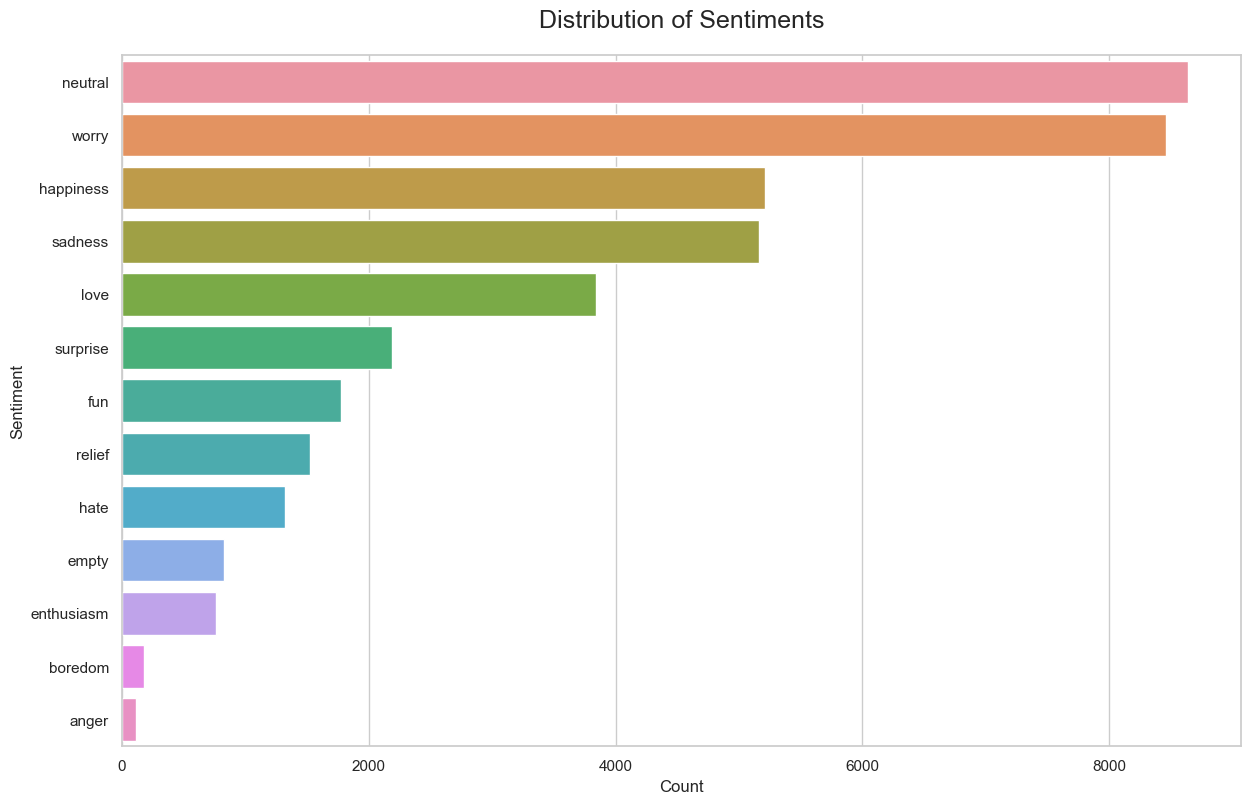

Plotting tweet length distribution by sentiment...


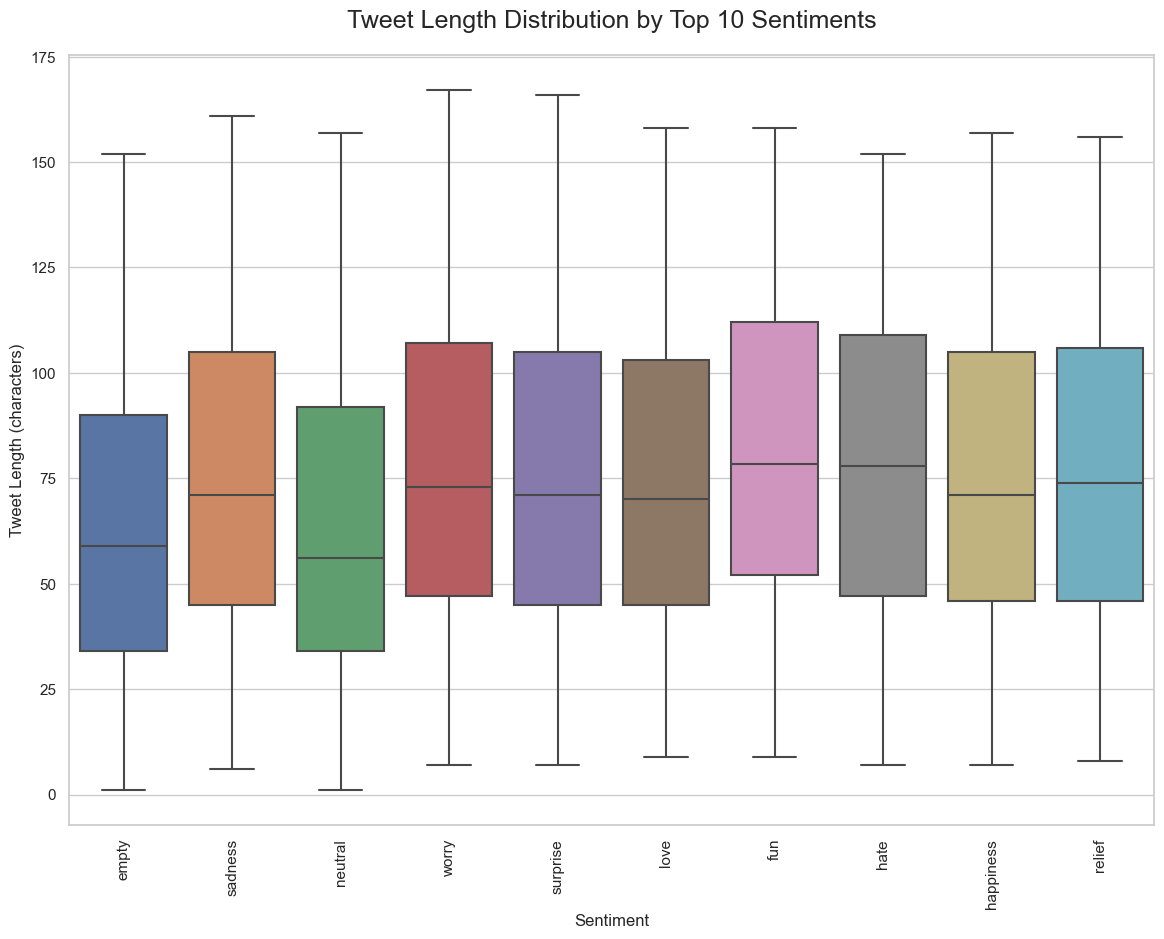

Plotting word count distribution by sentiment...


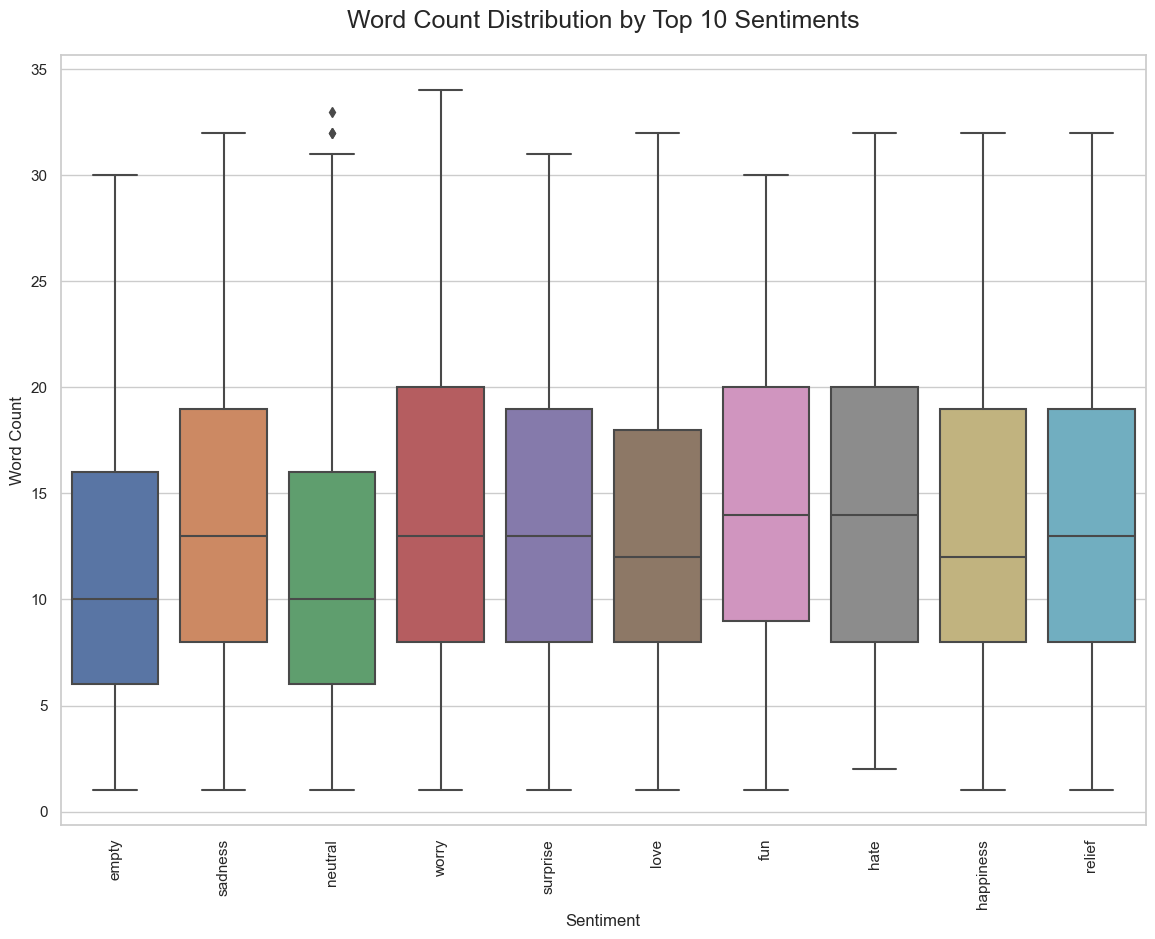

Plotting emoji usage by sentiment...


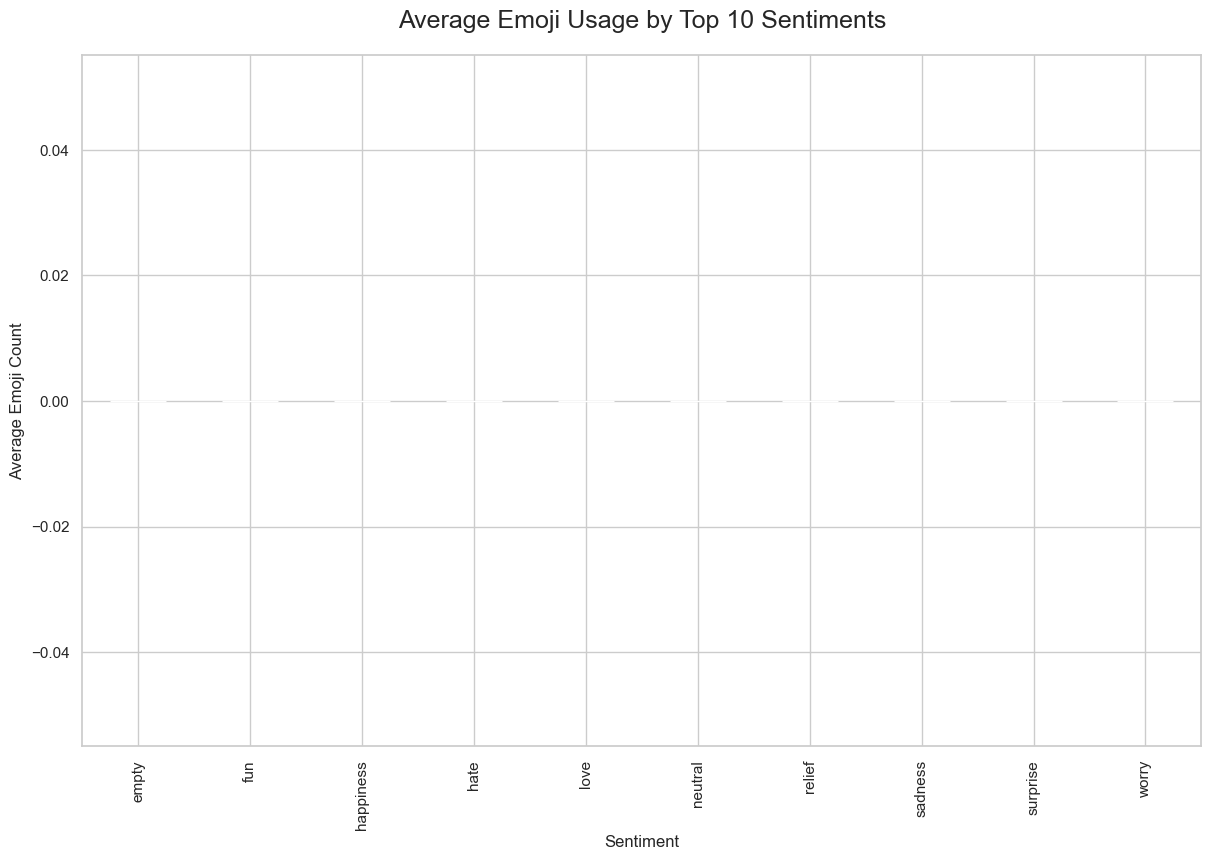

Plotting punctuation usage by sentiment...


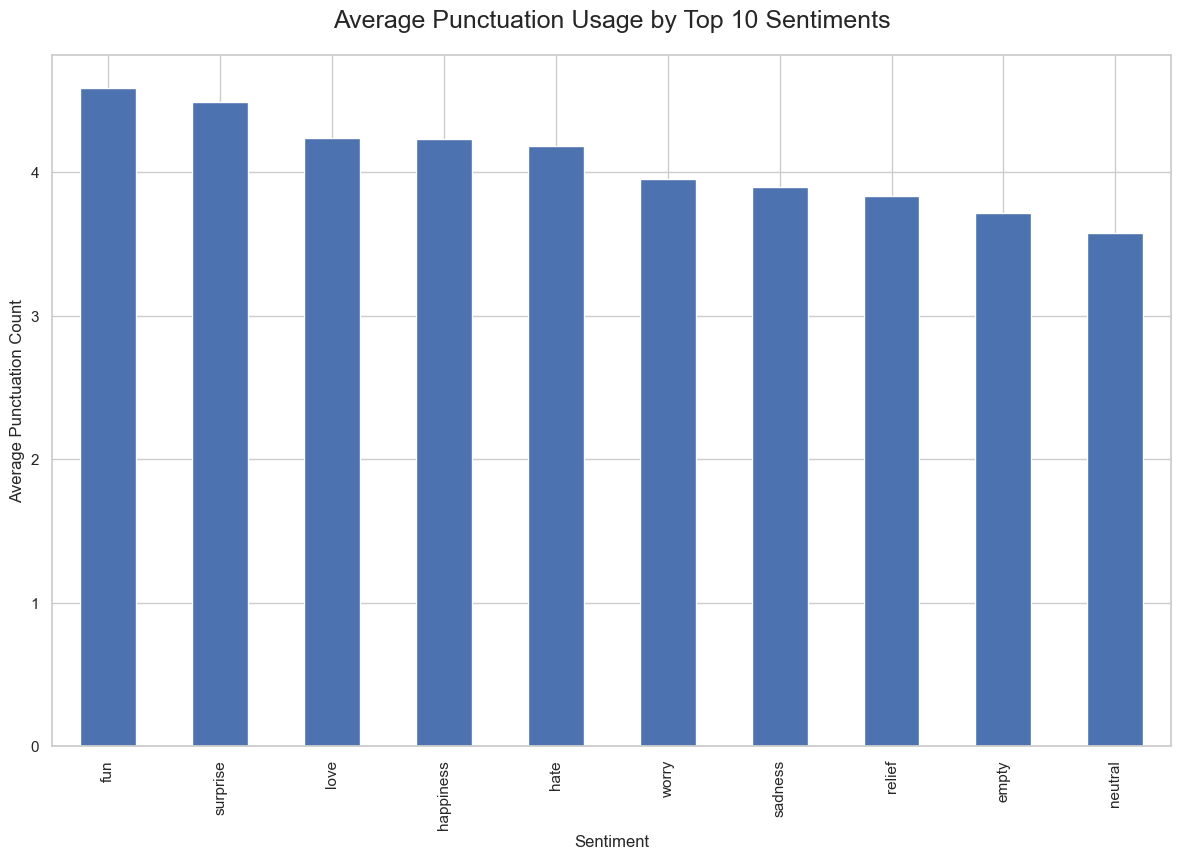

Generating word clouds for top 5 sentiments...


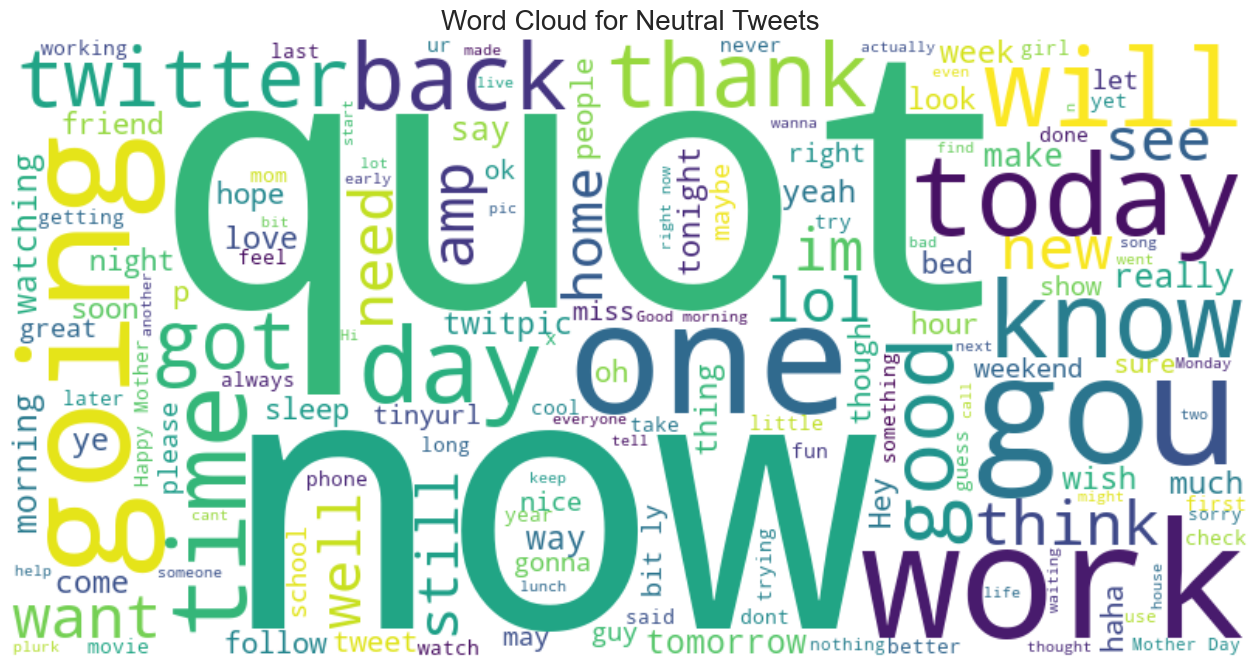

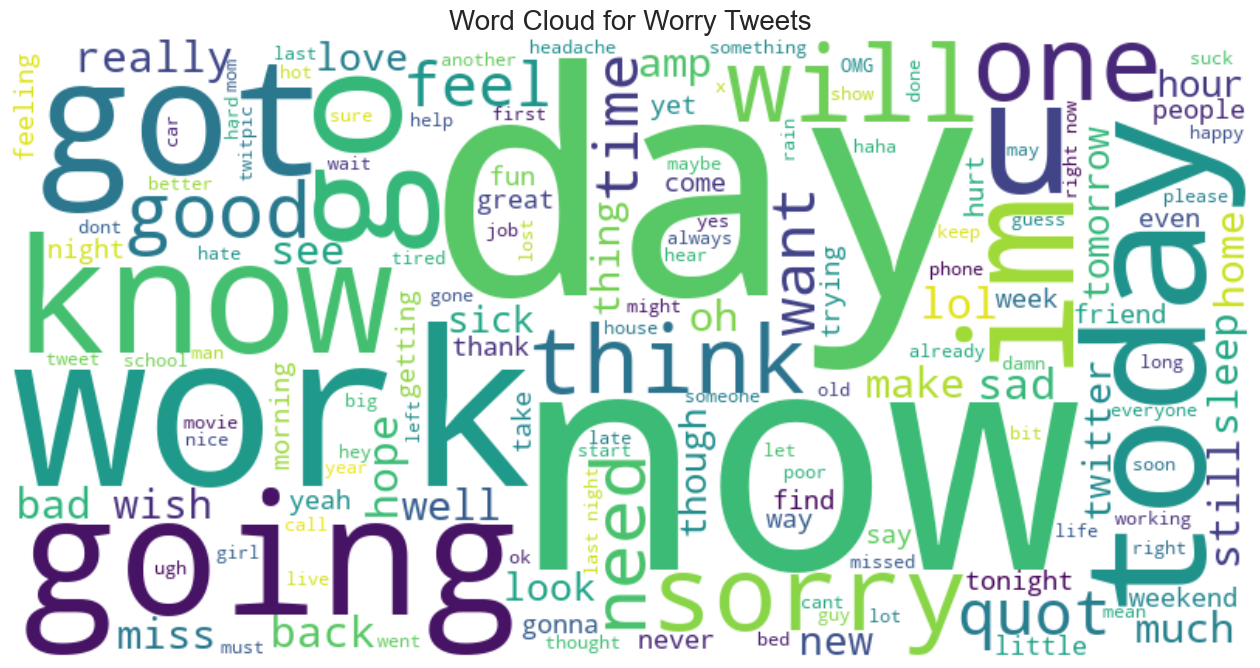

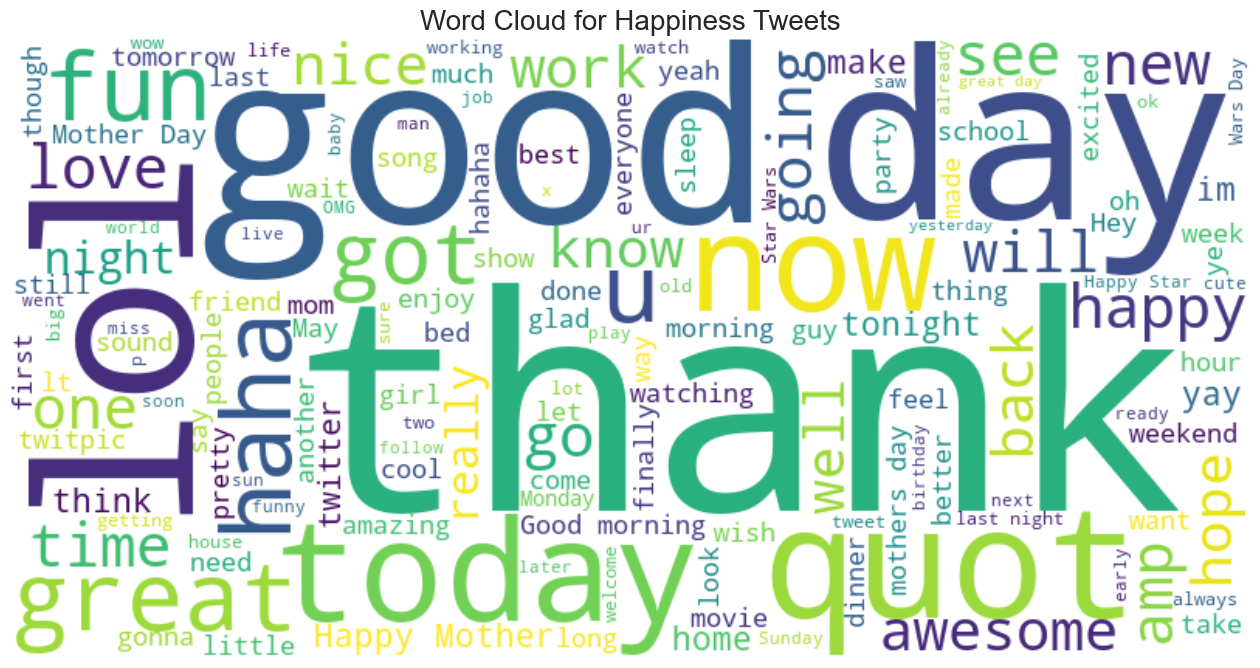

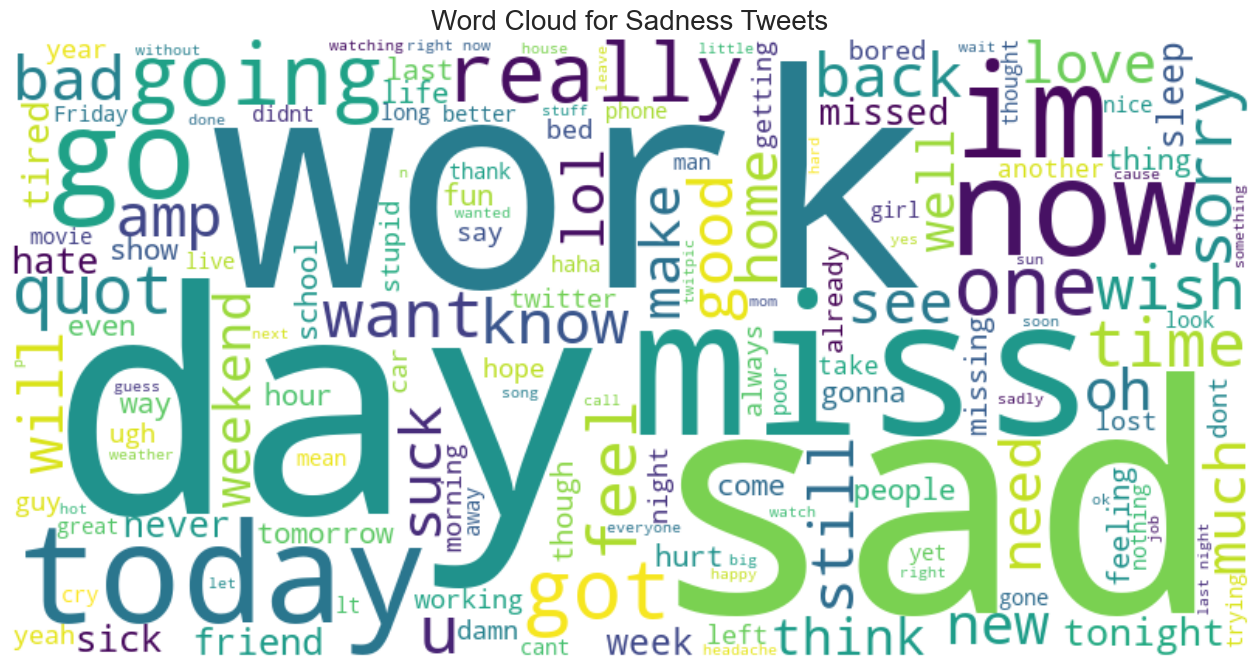

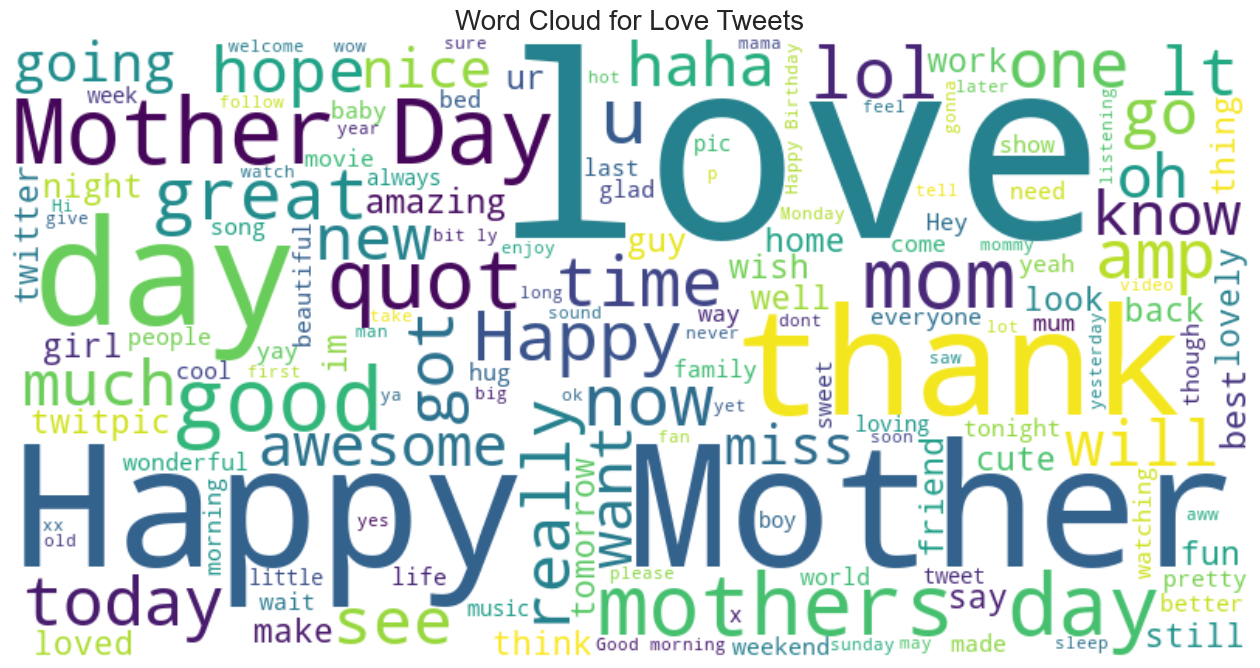

In [184]:
# -------------------- SENTIMENT DATASET VISUALIZATION --------------------
if not sentiment_df.empty:
    print("\n===== SENTIMENT DATASET VISUALIZATION =====\n")
    
    # 1. Sentiment Distribution
    print("Plotting sentiment distribution...")
    set_plot_params("Distribution of Sentiments")
    sns.countplot(y=sentiment_df['sentiment'], order=sentiment_df['sentiment'].value_counts().index)
    plt.xlabel('Count')
    plt.ylabel('Sentiment')
    plt.show()
    
    # 2. Tweet Length Distribution by Sentiment (Top 10 sentiments)
    print("Plotting tweet length distribution by sentiment...")
    top_sentiments = sentiment_df['sentiment'].value_counts().head(10).index
    plt.figure(figsize=(14, 10))
    sns.boxplot(x='sentiment', y='tweet_length', data=sentiment_df[sentiment_df['sentiment'].isin(top_sentiments)])
    plt.xticks(rotation=90)
    plt.xlabel('Sentiment')
    plt.ylabel('Tweet Length (characters)')
    plt.title('Tweet Length Distribution by Top 10 Sentiments', fontsize=18, pad=20)
    plt.show()
    
    # 3. Word Count Distribution by Sentiment (Top 10 sentiments)
    print("Plotting word count distribution by sentiment...")
    plt.figure(figsize=(14, 10))
    sns.boxplot(x='sentiment', y='word_count', data=sentiment_df[sentiment_df['sentiment'].isin(top_sentiments)])
    plt.xticks(rotation=90)
    plt.xlabel('Sentiment')
    plt.ylabel('Word Count')
    plt.title('Word Count Distribution by Top 10 Sentiments', fontsize=18, pad=20)
    plt.show()
    
    # 4. Emoji Usage by Sentiment (Top 10 sentiments)
    print("Plotting emoji usage by sentiment...")
    emoji_by_sentiment = sentiment_df[sentiment_df['sentiment'].isin(top_sentiments)].groupby('sentiment')['emoji_count'].mean().sort_values(ascending=False)
    set_plot_params("Average Emoji Usage by Top 10 Sentiments")
    emoji_by_sentiment.plot(kind='bar')
    plt.xlabel('Sentiment')
    plt.ylabel('Average Emoji Count')
    plt.show()
    
    # 5. Punctuation Usage by Sentiment (Top 10 sentiments)
    print("Plotting punctuation usage by sentiment...")
    punct_by_sentiment = sentiment_df[sentiment_df['sentiment'].isin(top_sentiments)].groupby('sentiment')['punctuation_count'].mean().sort_values(ascending=False)
    set_plot_params("Average Punctuation Usage by Top 10 Sentiments")
    punct_by_sentiment.plot(kind='bar')
    plt.xlabel('Sentiment')
    plt.ylabel('Average Punctuation Count')
    plt.show()
    
    # 6. Word Clouds for each sentiment (top 5 sentiments)
    print("Generating word clouds for top 5 sentiments...")
    top_five_sentiments = sentiment_df['sentiment'].value_counts().head(5).index
    
    for sentiment in top_five_sentiments:
        text = " ".join(tweet for tweet in sentiment_df[sentiment_df['sentiment'] == sentiment]['content'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(text)
        
        plt.figure(figsize=(16, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {sentiment.capitalize()} Tweets', fontsize=20)
        plt.show()


===== DISASTER DATASET VISUALIZATION =====

Plotting predicted label distribution...


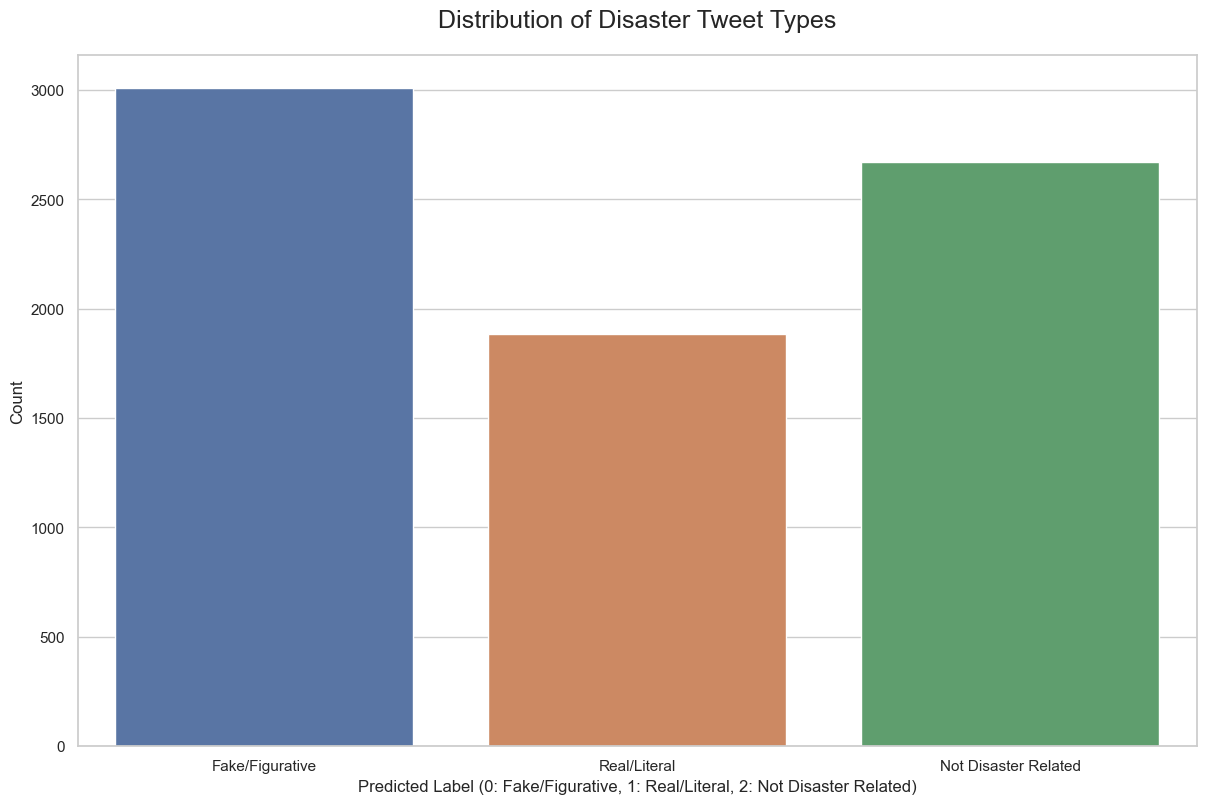

Plotting tweet length distribution by predicted label...


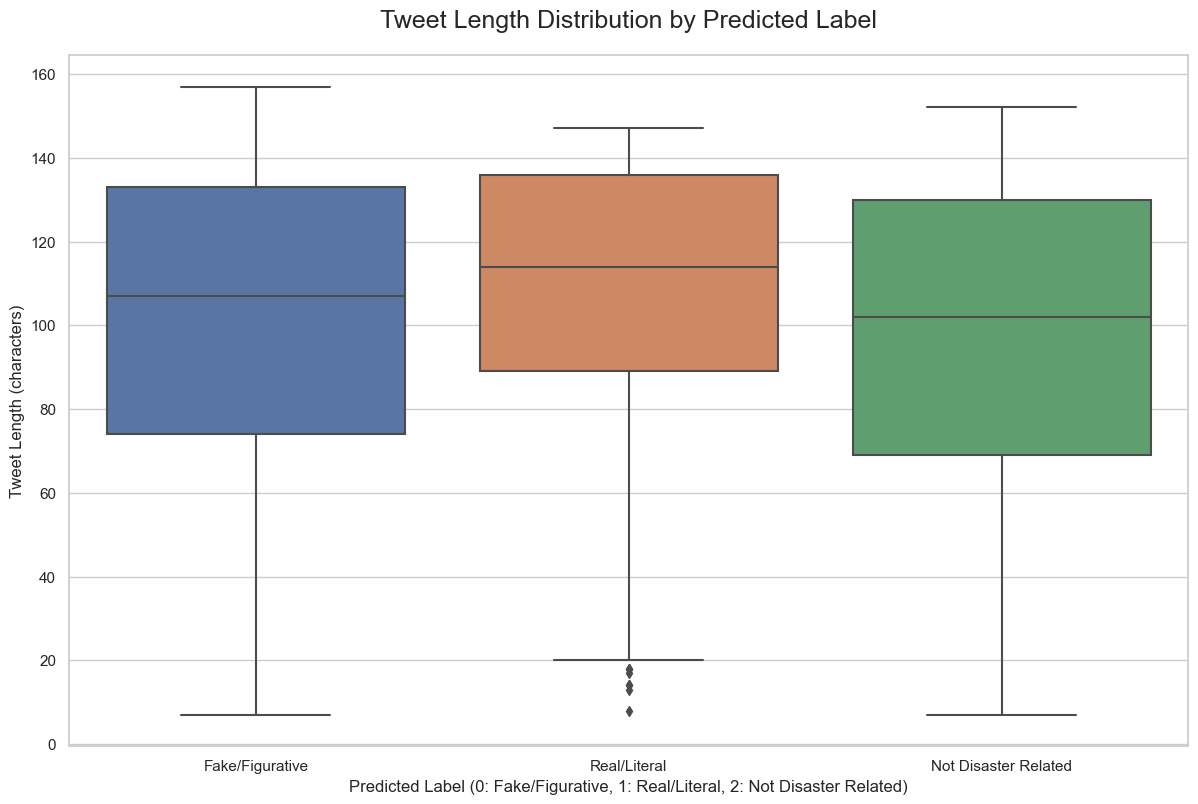

Plotting word count distribution by predicted label...


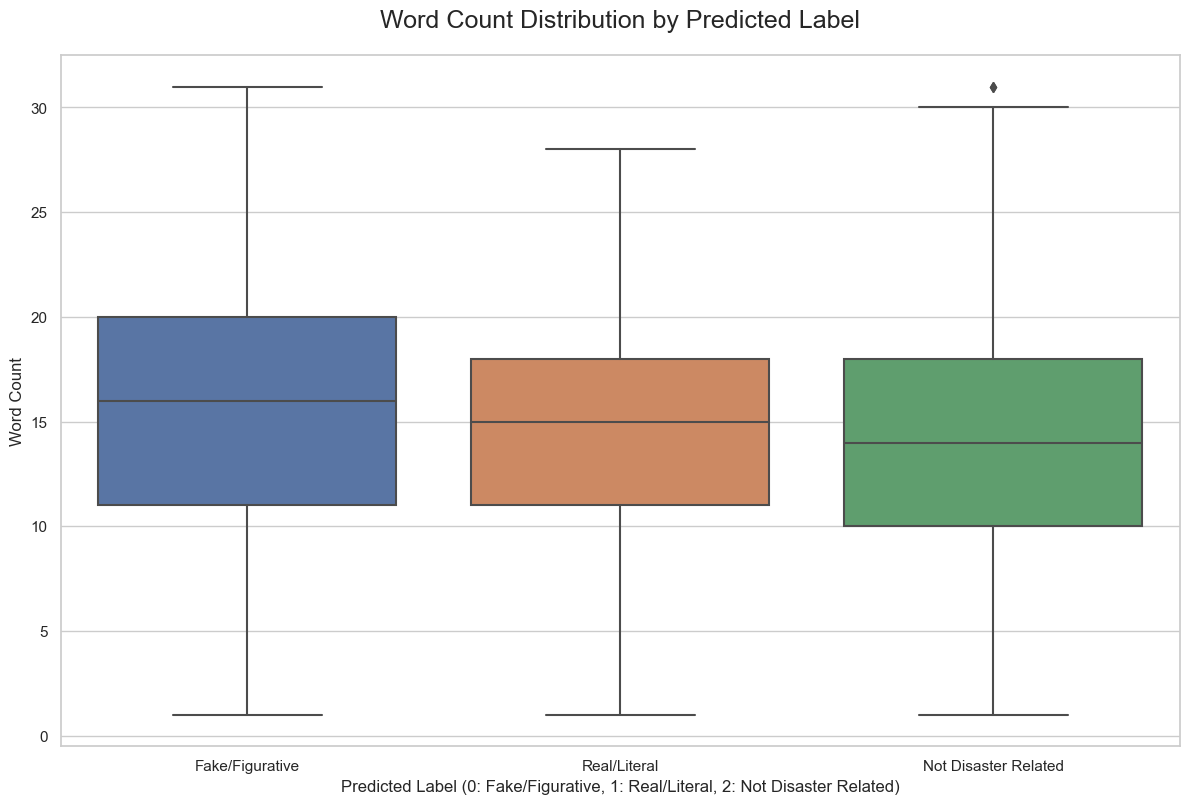

Plotting emoji usage by predicted label...


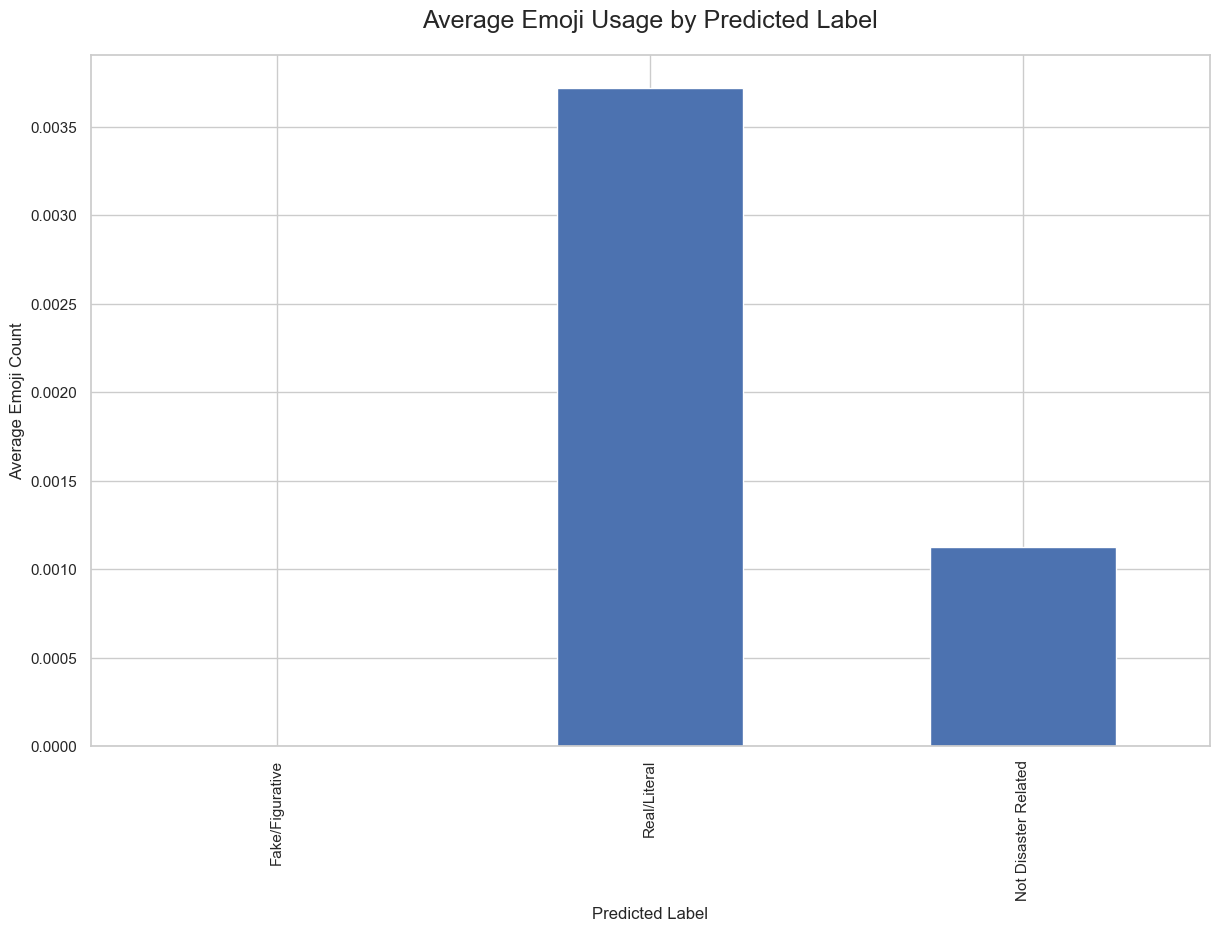

Plotting punctuation usage by predicted label...


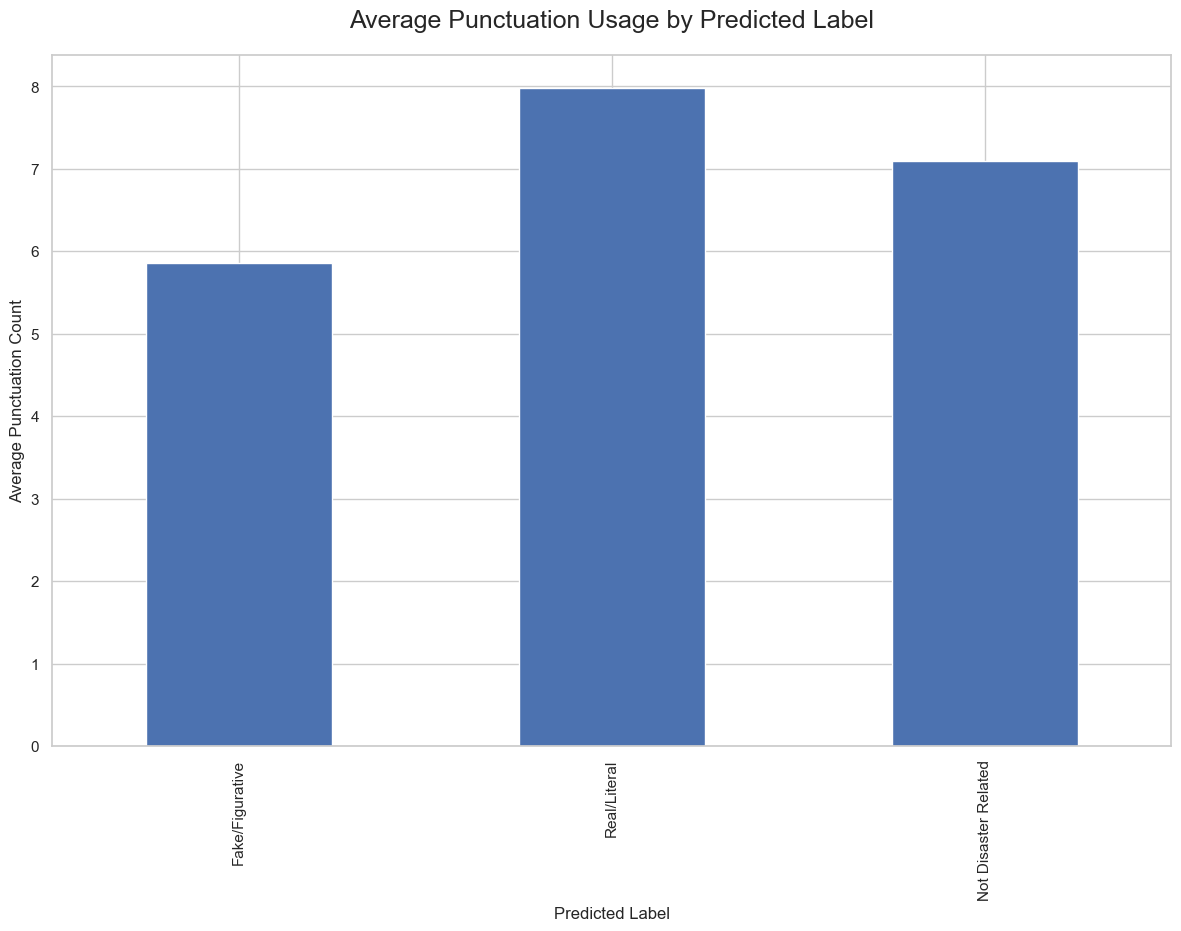

Generating word clouds for different types of disaster tweets...


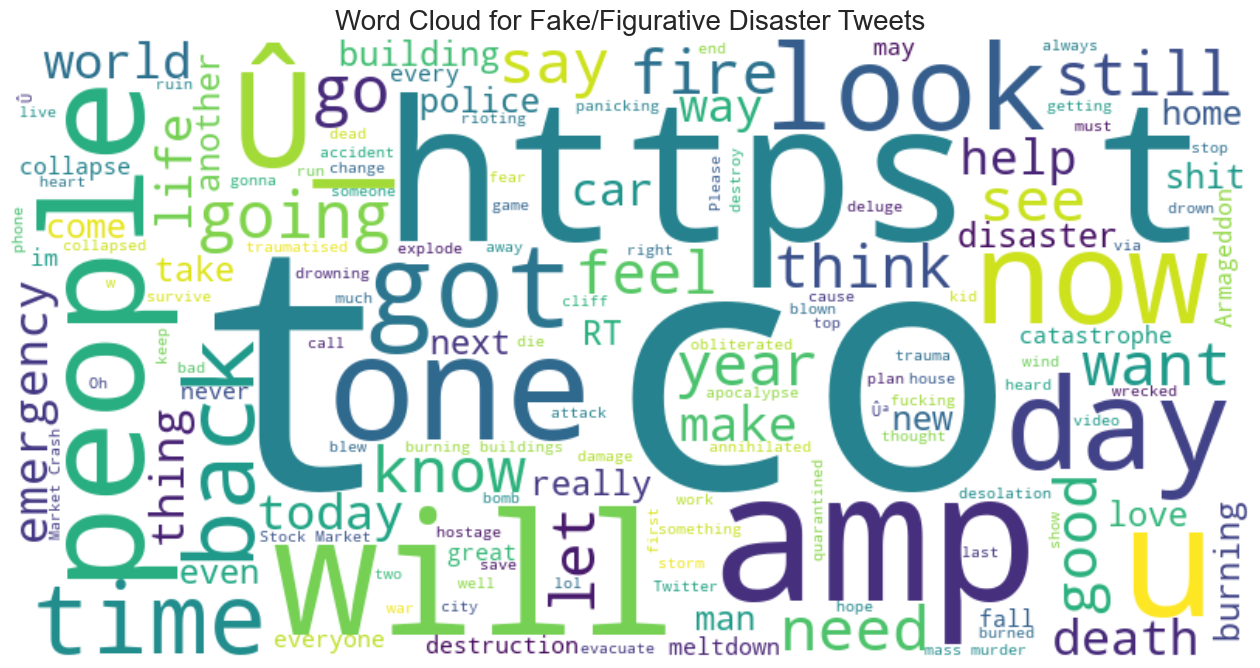

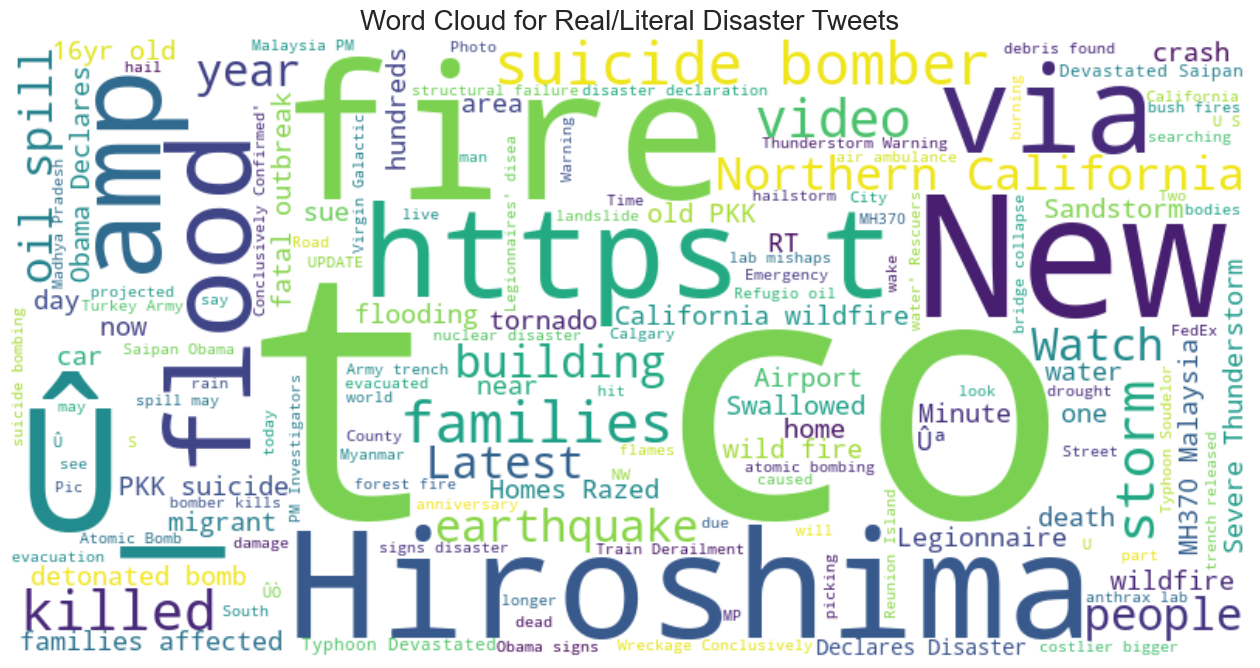

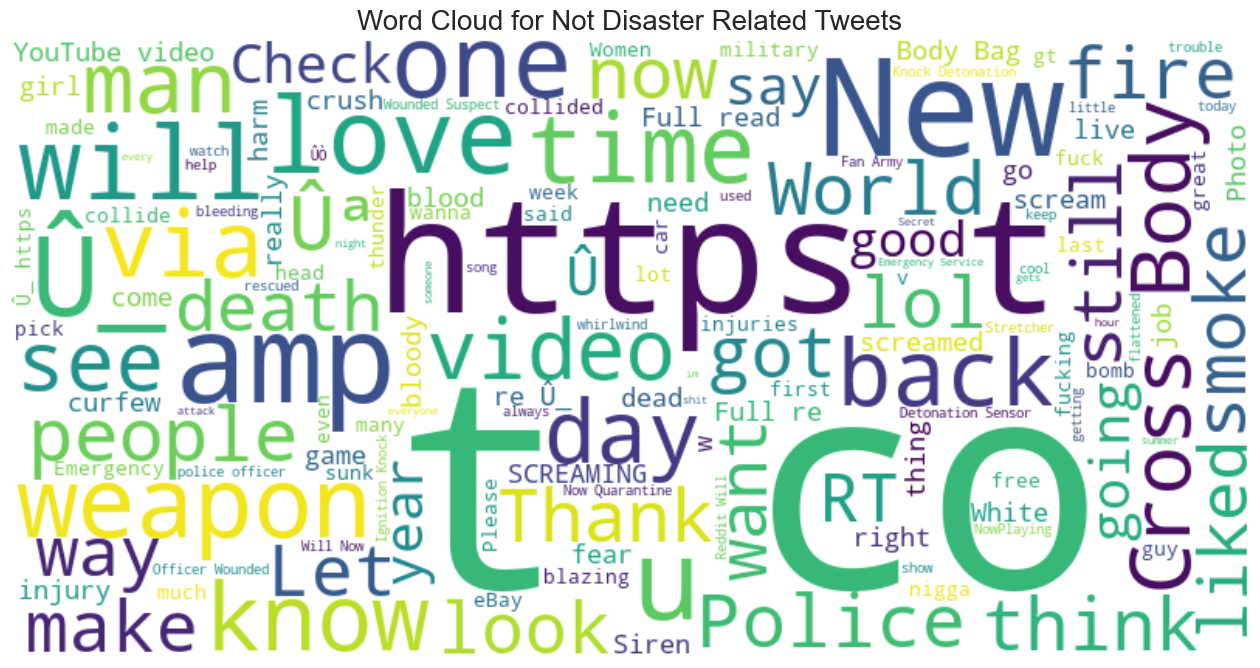

Plotting location analysis...


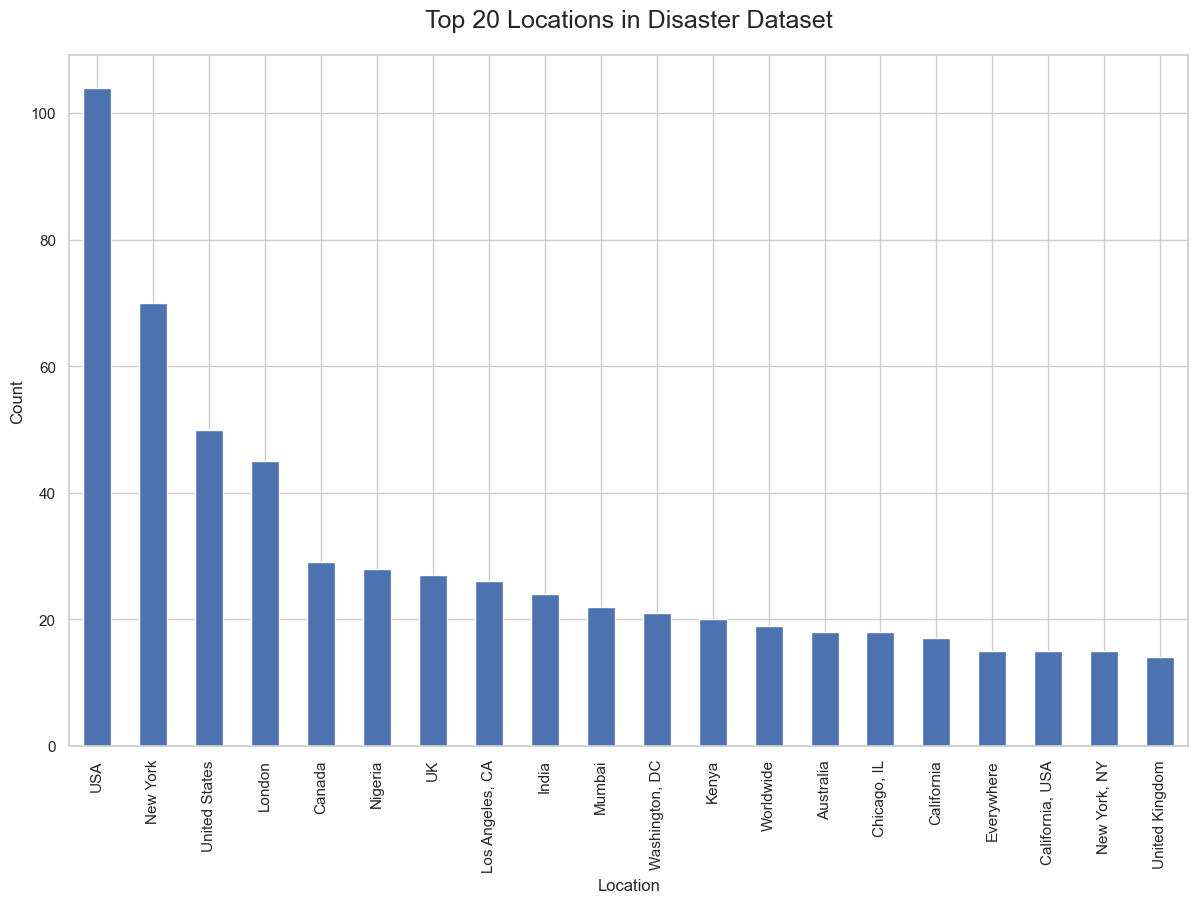

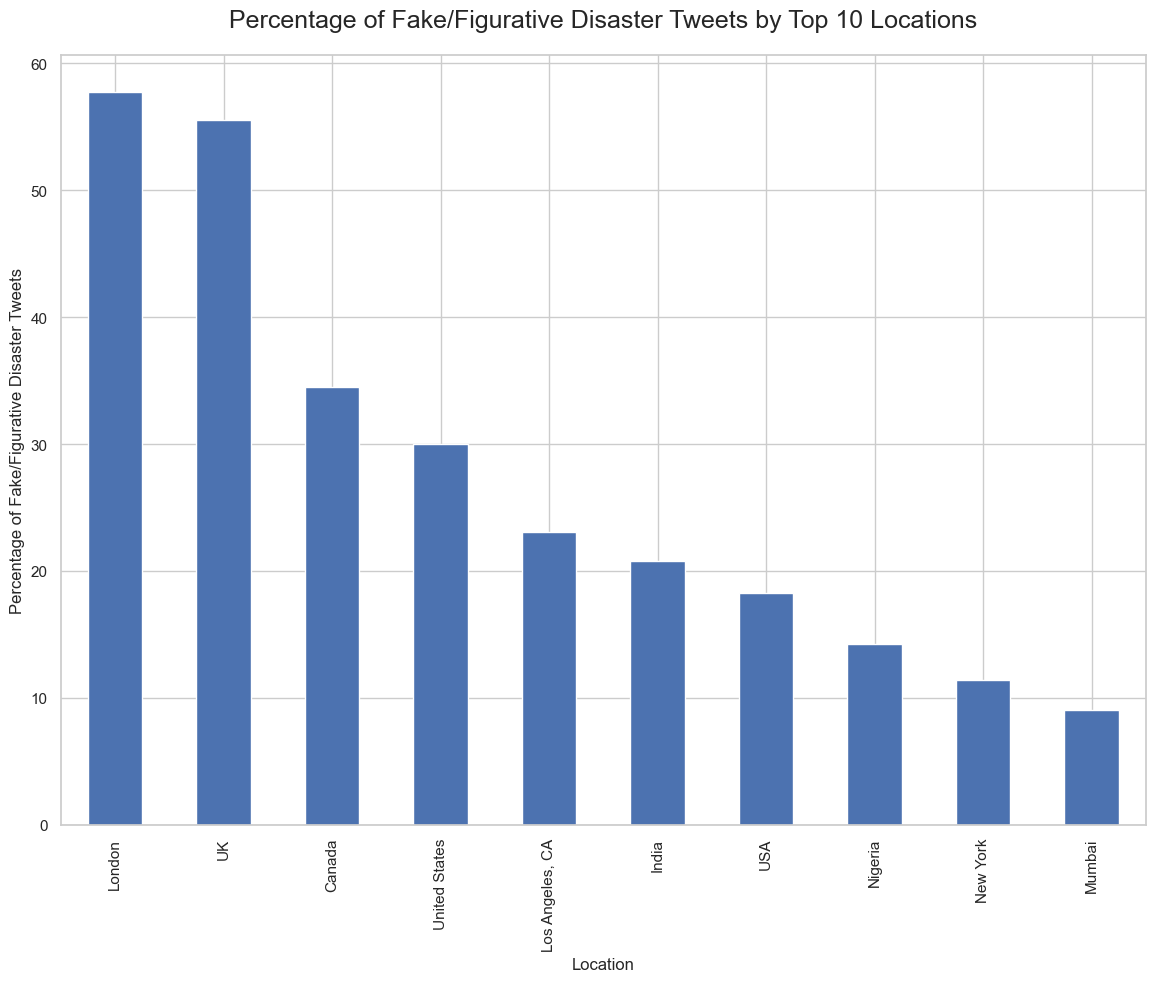

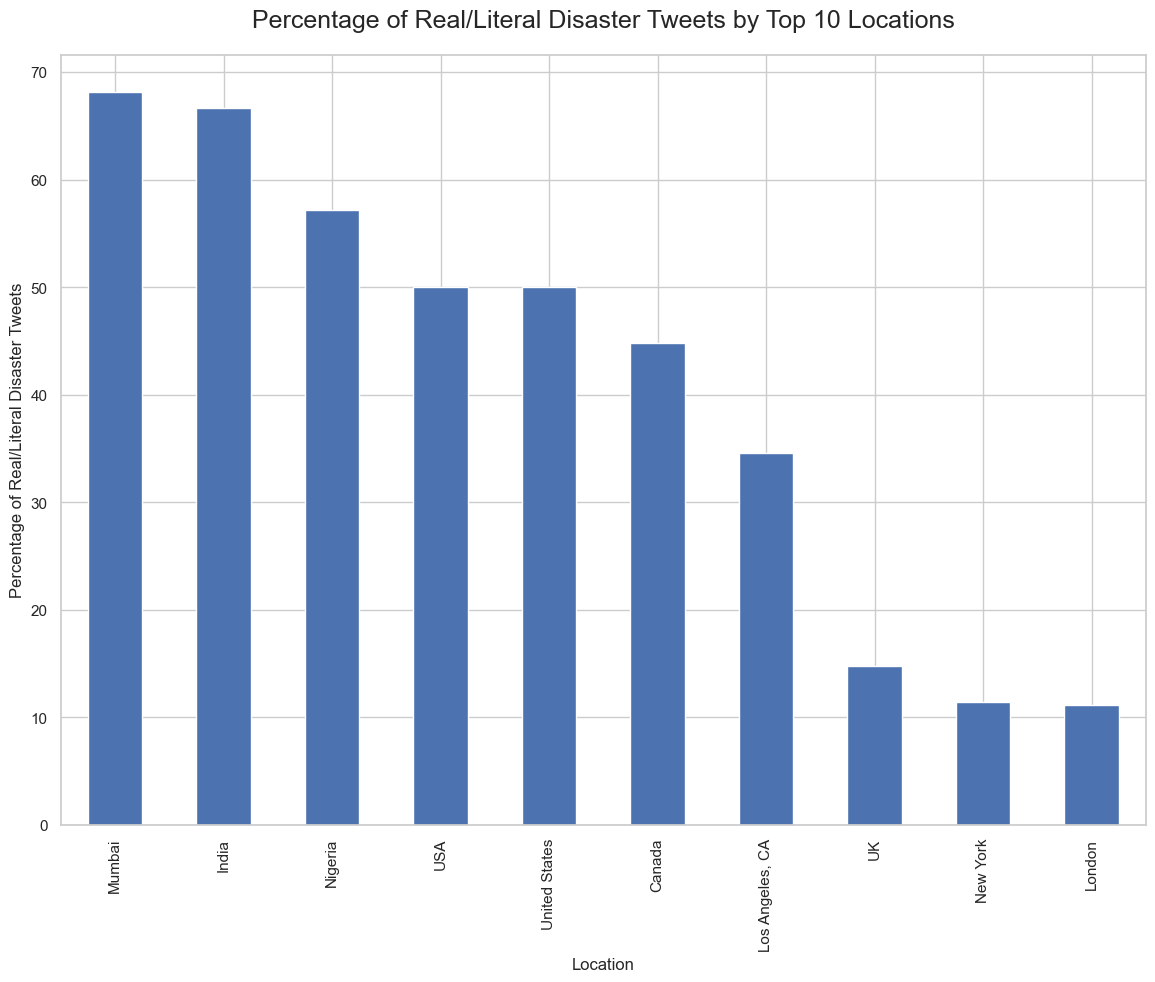

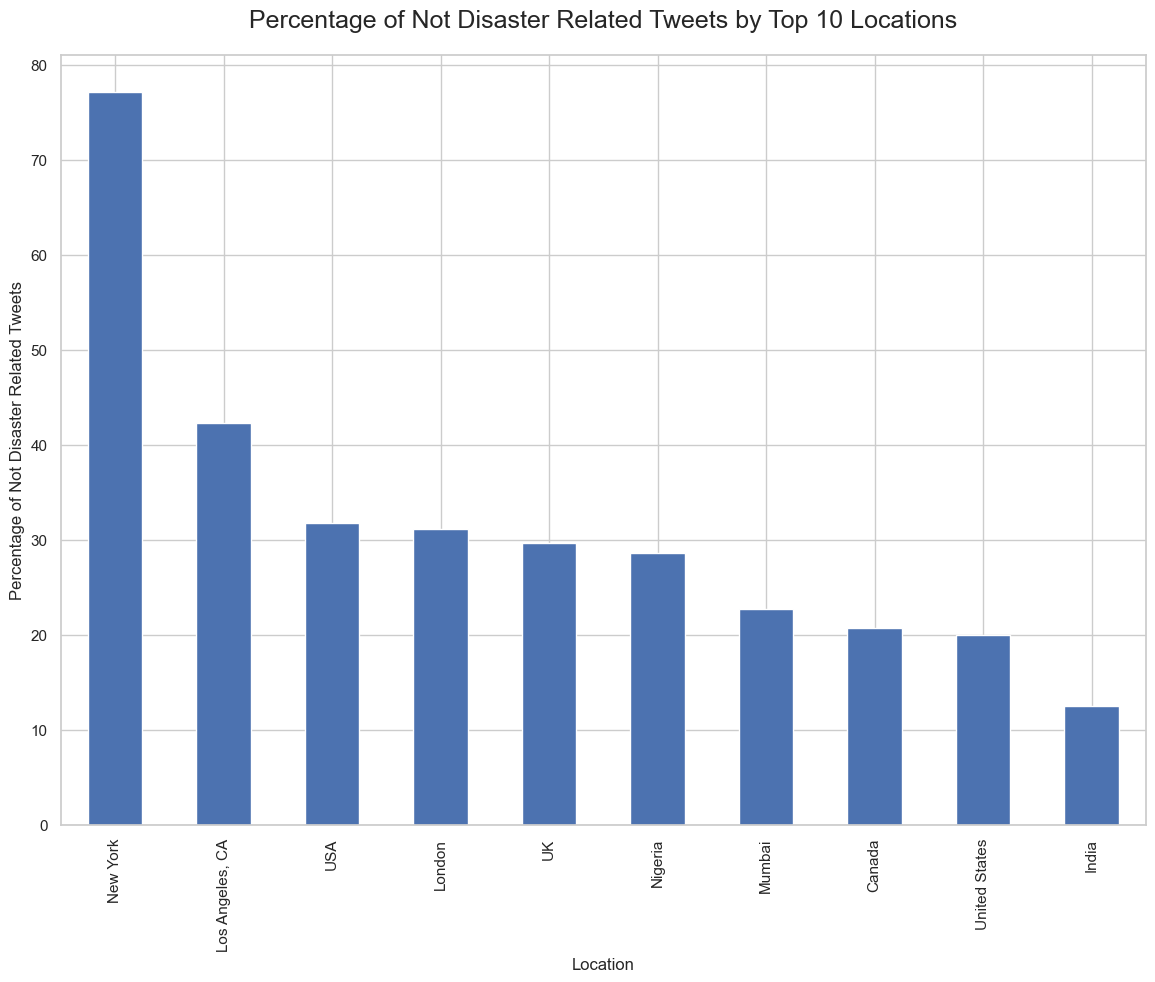

Plotting keyword analysis...


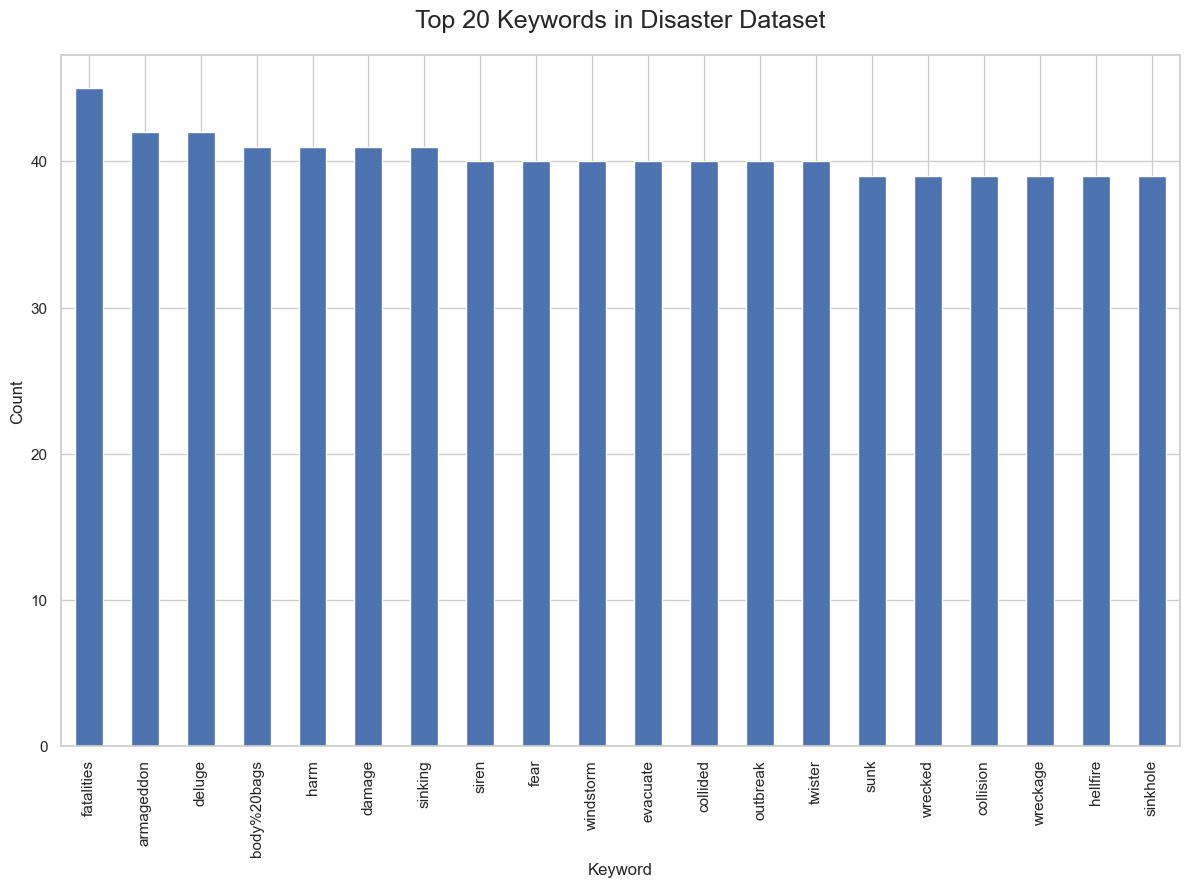

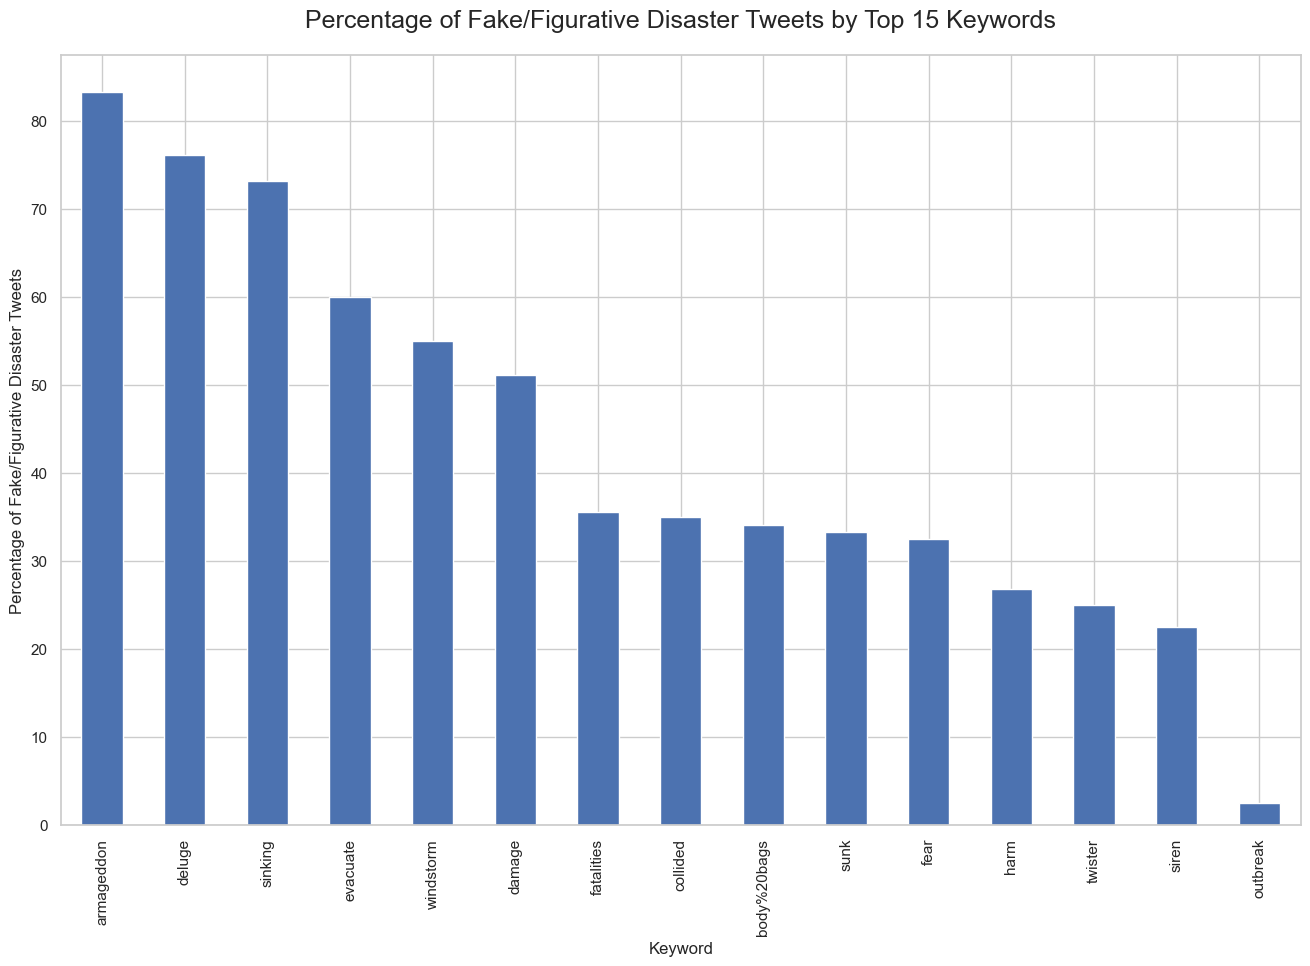

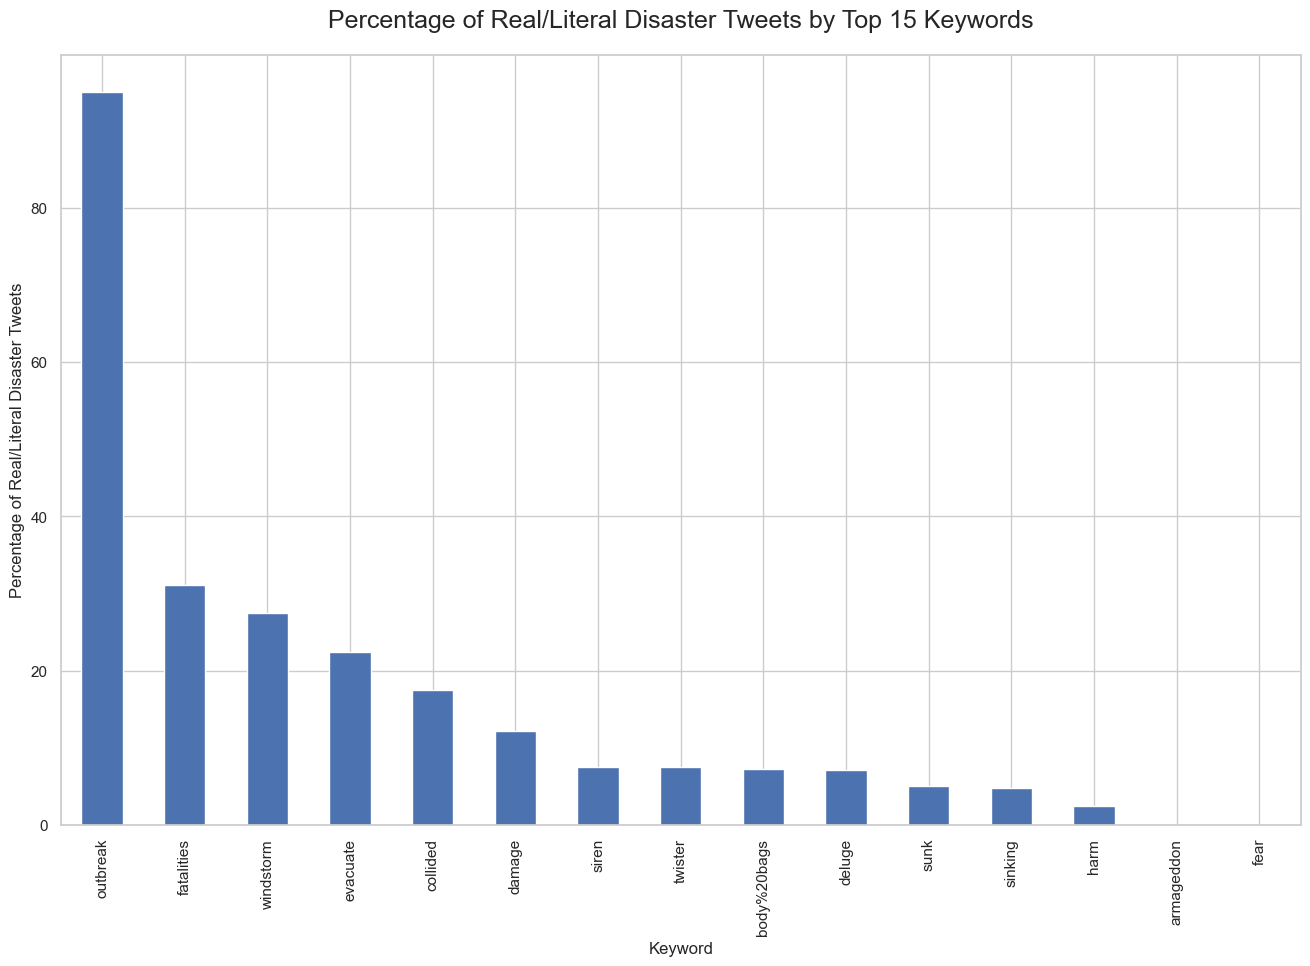

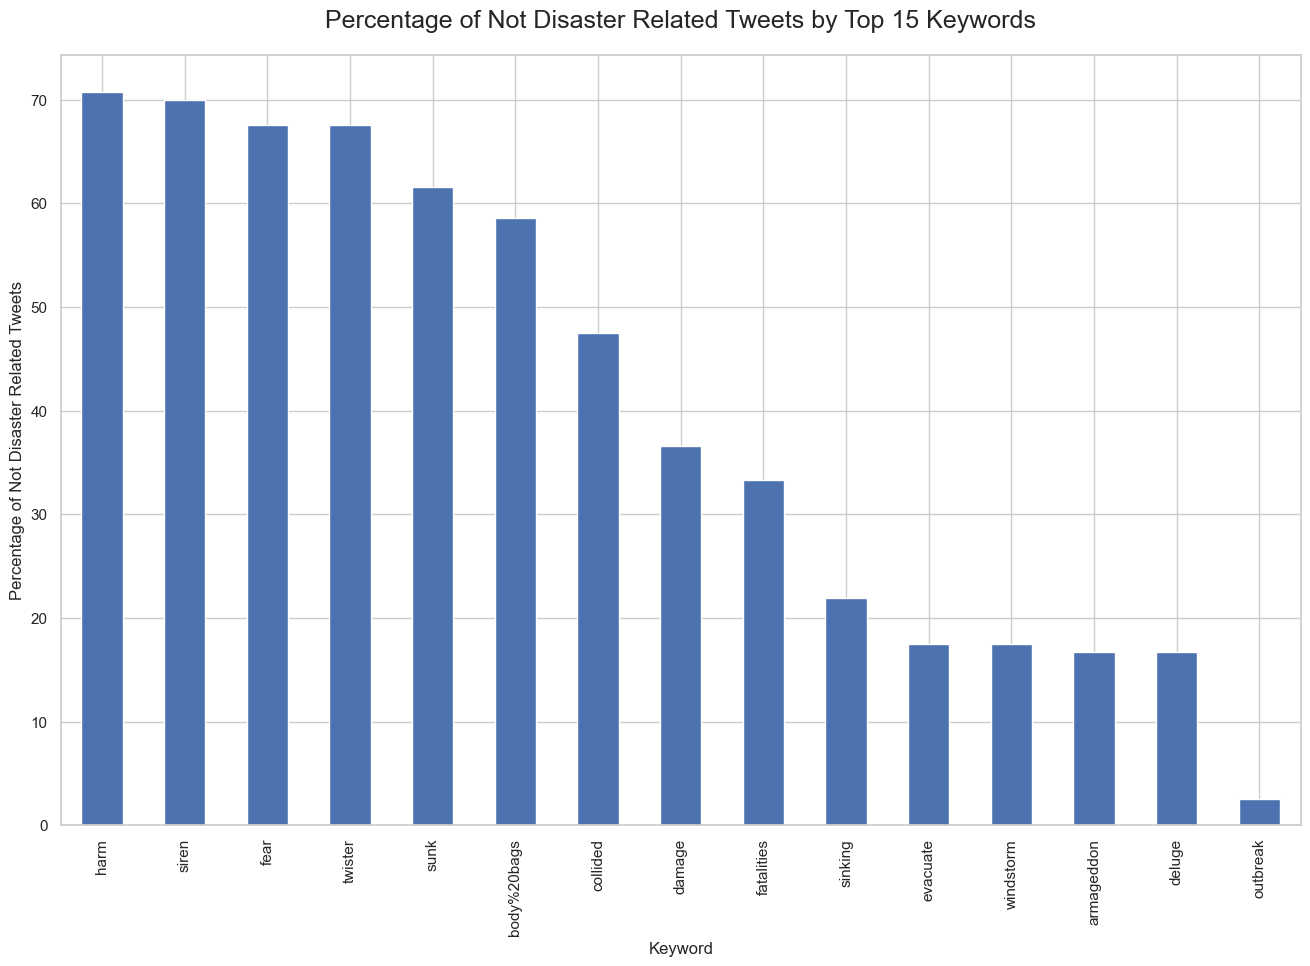

Plotting correlation matrix...


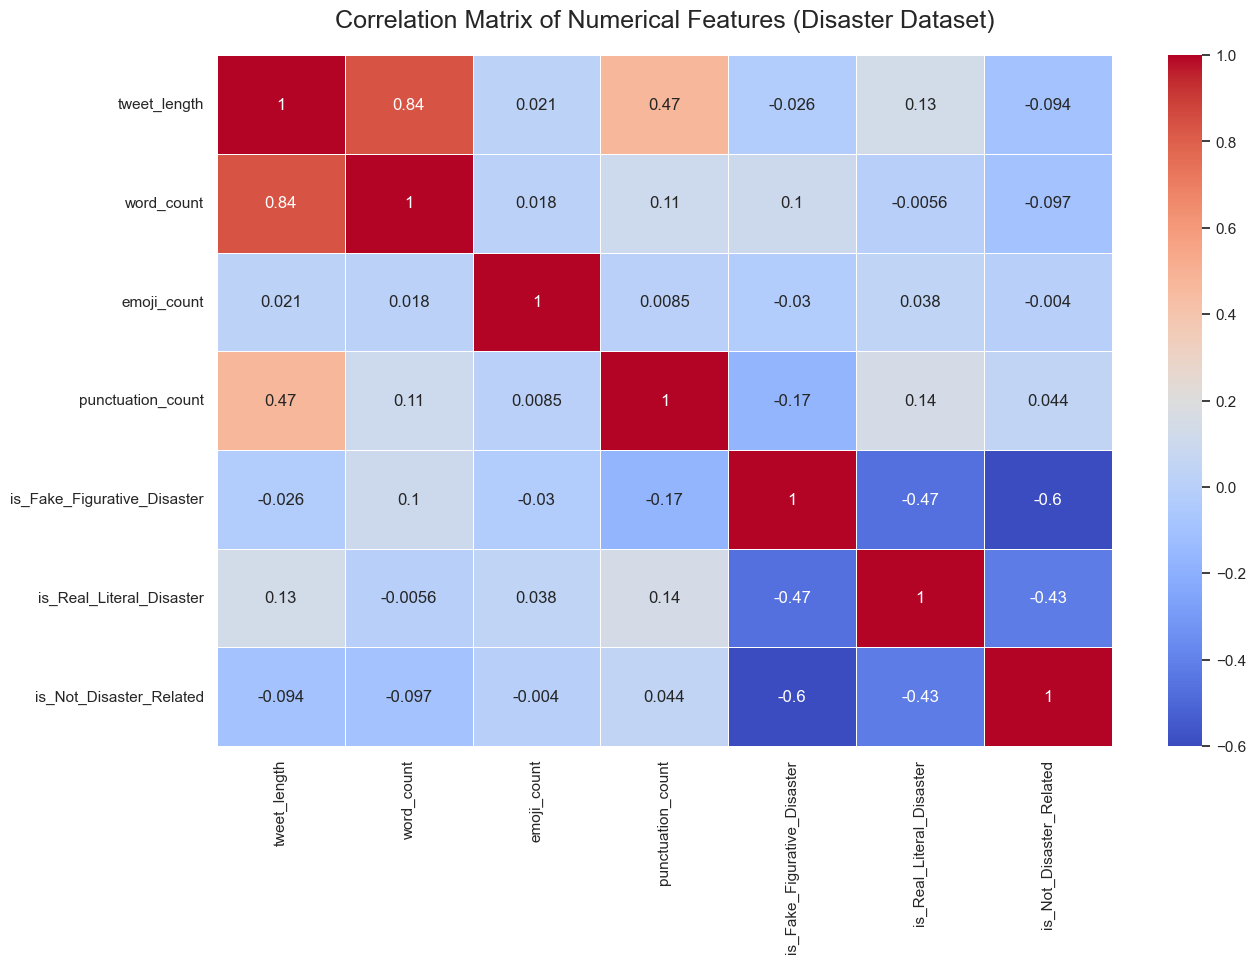

Plotting scatter plot of tweet length vs. word count...


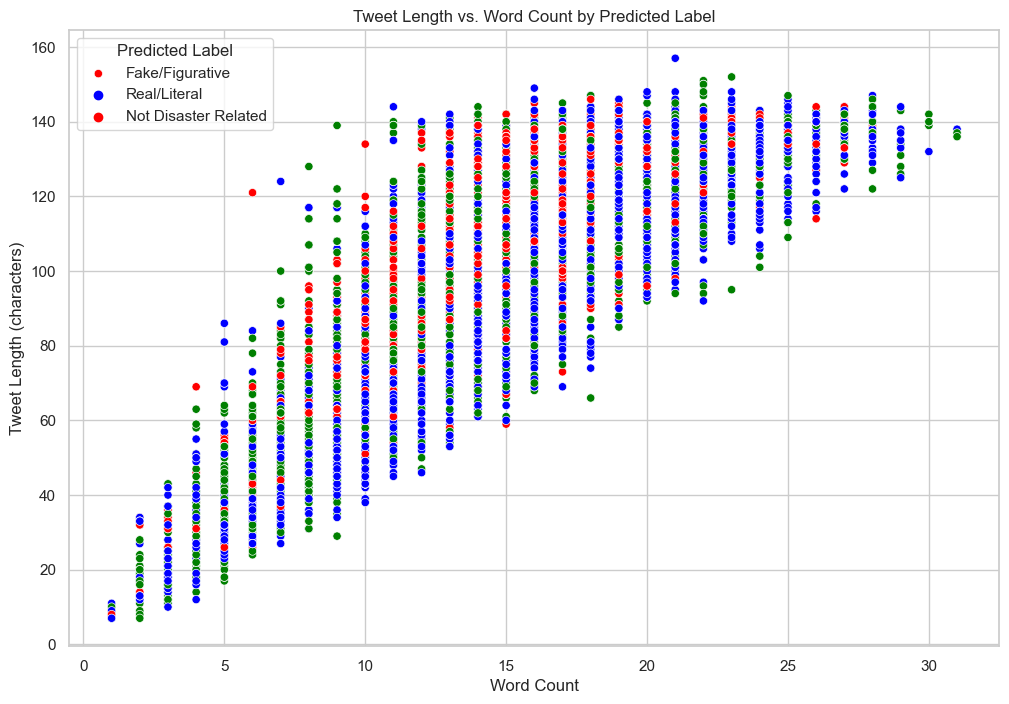

In [185]:
# -------------------- DISASTER DATASET VISUALIZATION --------------------
if not disaster_train_df.empty:
    print("\n===== DISASTER DATASET VISUALIZATION =====\n")
    
    # 1. Predicted Label Distribution
    print("Plotting predicted label distribution...")
    set_plot_params("Distribution of Disaster Tweet Types")
    sns.countplot(x=disaster_train_df['predicted_label'])
    plt.xlabel('Predicted Label (0: Fake/Figurative, 1: Real/Literal, 2: Not Disaster Related)')
    plt.ylabel('Count')
    plt.xticks([0, 1, 2], ['Fake/Figurative', 'Real/Literal', 'Not Disaster Related'])
    plt.show()
    
    # 2. Tweet Length Distribution by Predicted Label
    print("Plotting tweet length distribution by predicted label...")
    set_plot_params("Tweet Length Distribution by Predicted Label")
    sns.boxplot(x='predicted_label', y='tweet_length', data=disaster_train_df)
    plt.xlabel('Predicted Label (0: Fake/Figurative, 1: Real/Literal, 2: Not Disaster Related)')
    plt.ylabel('Tweet Length (characters)')
    plt.xticks([0, 1, 2], ['Fake/Figurative', 'Real/Literal', 'Not Disaster Related'])
    plt.show()
    
    # 3. Word Count Distribution by Predicted Label
    print("Plotting word count distribution by predicted label...")
    set_plot_params("Word Count Distribution by Predicted Label")
    sns.boxplot(x='predicted_label', y='word_count', data=disaster_train_df)
    plt.xlabel('Predicted Label (0: Fake/Figurative, 1: Real/Literal, 2: Not Disaster Related)')
    plt.ylabel('Word Count')
    plt.xticks([0, 1, 2], ['Fake/Figurative', 'Real/Literal', 'Not Disaster Related'])
    plt.show()
    
    # 4. Emoji Usage by Predicted Label
    print("Plotting emoji usage by predicted label...")
    emoji_by_label = disaster_train_df.groupby('predicted_label')['emoji_count'].mean()
    set_plot_params("Average Emoji Usage by Predicted Label")
    emoji_by_label.plot(kind='bar')
    plt.xticks([0, 1, 2], ['Fake/Figurative', 'Real/Literal', 'Not Disaster Related'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Average Emoji Count')
    plt.show()
    
    # 5. Punctuation Usage by Predicted Label
    print("Plotting punctuation usage by predicted label...")
    punct_by_label = disaster_train_df.groupby('predicted_label')['punctuation_count'].mean()
    set_plot_params("Average Punctuation Usage by Predicted Label")
    punct_by_label.plot(kind='bar')
    plt.xticks([0, 1, 2], ['Fake/Figurative', 'Real/Literal', 'Not Disaster Related'])
    plt.xlabel('Predicted Label')
    plt.ylabel('Average Punctuation Count')
    plt.show()
    
    # 6. Word Clouds for different types of tweets
    print("Generating word clouds for different types of disaster tweets...")
    label_names = {0: 'Fake/Figurative Disaster', 1: 'Real/Literal Disaster', 2: 'Not Disaster Related'}
    for label, name in label_names.items():
        text = " ".join(tweet for tweet in disaster_train_df[disaster_train_df['predicted_label'] == label]['text'].astype(str))
        wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(text)
        
        plt.figure(figsize=(16, 10))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Word Cloud for {name} Tweets', fontsize=20)
        plt.show()
    
    # 7. Location analysis (for non-null locations)
    if 'location' in disaster_train_df.columns:
        print("Plotting location analysis...")
        location_counts = disaster_train_df['location'].dropna().value_counts().head(20)
        set_plot_params("Top 20 Locations in Disaster Dataset")
        location_counts.plot(kind='bar')
        plt.xlabel('Location')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()
        
        # Distribution of different types of tweets by top locations
        top_locations = disaster_train_df['location'].dropna().value_counts().head(10).index
        location_label_df = disaster_train_df[disaster_train_df['location'].isin(top_locations)]
        
        # For each category, show percentage
        for label, name in label_names.items():
            plt.figure(figsize=(14, 10))
            label_by_location = pd.crosstab(location_label_df['location'], 
                                          location_label_df['predicted_label'] == label, 
                                          normalize='index') * 100
            if True in label_by_location.columns:
                label_by_location[True].sort_values(ascending=False).plot(kind='bar')
            plt.xlabel('Location')
            plt.ylabel(f'Percentage of {name} Tweets')
            plt.title(f'Percentage of {name} Tweets by Top 10 Locations', fontsize=18, pad=20)
            plt.xticks(rotation=90)
            plt.show()
    
    # 8. Keyword analysis
    if 'keyword' in disaster_train_df.columns:
        print("Plotting keyword analysis...")
        keyword_counts = disaster_train_df['keyword'].dropna().value_counts().head(20)
        set_plot_params("Top 20 Keywords in Disaster Dataset")
        keyword_counts.plot(kind='bar')
        plt.xlabel('Keyword')
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.show()
        
        # Distribution of different types of tweets by top keywords
        top_keywords = disaster_train_df['keyword'].dropna().value_counts().head(15).index
        keyword_label_df = disaster_train_df[disaster_train_df['keyword'].isin(top_keywords)]
        
        # For each category, show percentage
        for label, name in label_names.items():
            plt.figure(figsize=(16, 10))
            label_by_keyword = pd.crosstab(keyword_label_df['keyword'], 
                                         keyword_label_df['predicted_label'] == label, 
                                         normalize='index') * 100
            if True in label_by_keyword.columns:
                label_by_keyword[True].sort_values(ascending=False).plot(kind='bar')
            plt.xlabel('Keyword')
            plt.ylabel(f'Percentage of {name} Tweets')
            plt.title(f'Percentage of {name} Tweets by Top 15 Keywords', fontsize=18, pad=20)
            plt.xticks(rotation=90)
            plt.show()
    
    # 9. Correlation matrix of numerical features
    print("Plotting correlation matrix...")
    # Create dummy variables for predicted_label since it's now categorical with 3 levels
    disaster_numeric = disaster_train_df[['tweet_length', 'word_count', 'emoji_count', 'punctuation_count']].copy()
    
    # Add dummy variables for each category of predicted_label
    for label, name in label_names.items():
        disaster_numeric[f'is_{name.replace("/", "_").replace(" ", "_")}'] = (disaster_train_df['predicted_label'] == label).astype(int)
    
    set_plot_params("Correlation Matrix of Numerical Features (Disaster Dataset)")
    sns.heatmap(disaster_numeric.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.show()
    
    # 10. Scatter plot of tweet length vs. word count by predicted label
    print("Plotting scatter plot of tweet length vs. word count...")
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='word_count', y='tweet_length', hue='predicted_label', 
                    data=disaster_train_df, palette=['blue', 'red', 'green'])
    plt.xlabel('Word Count')
    plt.ylabel('Tweet Length (characters)')
    plt.title("Tweet Length vs. Word Count by Predicted Label")
    plt.legend(title='Predicted Label', labels=['Fake/Figurative', 'Real/Literal', 'Not Disaster Related'])
    plt.show()

In [186]:
pip install textblob


Note: you may need to restart the kernel to use updated packages.


In [187]:
# Import necessary libraries
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
import string
import re
import nltk
from textblob import TextBlob
import random
from tqdm import tqdm
import time

# Ensure NLTK resources are downloaded
try:
    nltk.data.find('tokenizers/punkt')
    nltk.data.find('corpora/stopwords')
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aatmika\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aatmika\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aatmika\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [188]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define slang dictionary for common tweet slangs
slang_dict = {
    'u': 'you',
    'r': 'are',
    'y': 'why',
    'ur': 'your',
    '2': 'to',
    '4': 'for',
    'b': 'be',
    'btw': 'by the way',
    'cuz': 'because',
    'dm': 'direct message',
    'fb': 'facebook',
    'idk': 'i don\'t know',
    'imo': 'in my opinion',
    'lol': 'laugh out loud',
    'omg': 'oh my god',
    'tbh': 'to be honest',
    'thx': 'thanks',
    'tho': 'though',
    'w/': 'with',
    'w/o': 'without',
    'wtf': 'what the fuck',
    'ya': 'you',
    'tysm': 'thank you so much',
    'ttyl': 'talk to you later',
    'tmrw': 'tomorrow',
}

In [189]:
# Function for text preprocessing
def preprocess_text(text, remove_stopwords=True, do_lemmatization=True, handle_slang=True):
    """
    Preprocesses the text by performing the following operations:
    1. Convert to lowercase
    2. Remove URLs
    3. Remove HTML tags
    4. Remove punctuation
    5. Replace slang words (optional)
    6. Remove stopwords (optional)
    7. Lemmatize words (optional)
    
    Args:
        text (str): Input text to preprocess
        remove_stopwords (bool): Whether to remove stopwords
        do_lemmatization (bool): Whether to lemmatize words
        handle_slang (bool): Whether to replace common slang words
        
    Returns:
        str: Preprocessed text
    """
    if not isinstance(text, str):
        return ""
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Handle slang words
    if handle_slang:
        tokens = [slang_dict.get(word, word) for word in tokens]
    
    # Remove stopwords
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize
    if do_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back to text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [190]:
# Function to extract sentiment scores
def extract_sentiment(text):
    """
    Extracts sentiment scores from text using TextBlob.
    
    Args:
        text (str): Input text
        
    Returns:
        tuple: (polarity, subjectivity) scores
    """
    if not isinstance(text, str) or text.strip() == "":
        return (0.0, 0.0)
    
    analysis = TextBlob(text)
    return (analysis.sentiment.polarity, analysis.sentiment.subjectivity)

In [191]:
# ----- IMPROVED DATA AUGMENTATION METHODS -----

# 1. Simple text augmentation using word replacements
def synonym_replacement(text, n=1):
    """
    Replace n words in the text with their synonyms.
    
    Args:
        text (str): Input text
        n (int): Number of words to replace
        
    Returns:
        str: Augmented text
    """
    if not isinstance(text, str) or text.strip() == "":
        return text
    
    words = text.split()
    if len(words) <= 1:
        return text
    
    # Limit n to at most 30% of words
    n = min(n, max(1, int(len(words) * 0.3)))
    
    # Select random word positions to replace (excluding very short words)
    eligible_positions = [i for i, word in enumerate(words) if len(word) > 3]
    if not eligible_positions:
        return text
    
    positions_to_replace = random.sample(eligible_positions, min(n, len(eligible_positions)))
    
    for pos in positions_to_replace:
        word = words[pos]
        # Get synonyms using TextBlob
        synonyms = []
        try:
            synsets = TextBlob(word).words[0].get_synsets()
            for synset in synsets:
                for lemma in synset.lemmas():
                    synonym = lemma.name().replace('_', ' ')
                    if synonym != word:
                        synonyms.append(synonym)
        except:
            continue
            
        if synonyms:
            words[pos] = random.choice(synonyms)
            
    return ' '.join(words)

# 2. Random swap
def random_swap(text, n=1):
    """
    Randomly swap the positions of n pairs of words in the text.
    
    Args:
        text (str): Input text
        n (int): Number of swaps
        
    Returns:
        str: Augmented text
    """
    if not isinstance(text, str) or text.strip() == "":
        return text
    
    words = text.split()
    if len(words) <= 1:
        return text
    
    # Limit n to at most 30% of words
    n = min(n, max(1, int(len(words) * 0.3)))
    
    for _ in range(n):
        if len(words) >= 2:  # Need at least 2 words to swap
            idx1, idx2 = random.sample(range(len(words)), 2)
            words[idx1], words[idx2] = words[idx2], words[idx1]
            
    return ' '.join(words)

# 3. Random deletion
def random_deletion(text, p=0.1):
    """
    Randomly delete words from the text with probability p.
    
    Args:
        text (str): Input text
        p (float): Probability of deletion
        
    Returns:
        str: Augmented text
    """
    if not isinstance(text, str) or text.strip() == "":
        return text
    
    words = text.split()
    if len(words) <= 1:
        return text
    
    # Ensure we keep at least 70% of words
    p = min(p, 0.3)
    
    # Randomly delete words
    kept_words = []
    for word in words:
        if random.random() > p:
            kept_words.append(word)
            
    # If all words were deleted, keep a random one
    if not kept_words:
        kept_words = [random.choice(words)]
        
    return ' '.join(kept_words)

# 4. Random insertion
def random_insertion(text, n=1):
    """
    Randomly insert n words into the text.
    
    Args:
        text (str): Input text
        n (int): Number of words to insert
        
    Returns:
        str: Augmented text
    """
    if not isinstance(text, str) or text.strip() == "":
        return text
    
    words = text.split()
    if not words:
        return text
    
    # Limit n to at most 30% of words
    n = min(n, max(1, int(len(words) * 0.3)))
    
    # Get all words with their synonyms
    all_synonyms = []
    for word in words:
        if len(word) > 3:  # Only consider words with length > 3
            try:
                synsets = TextBlob(word).words[0].get_synsets()
                for synset in synsets:
                    for lemma in synset.lemmas():
                        synonym = lemma.name().replace('_', ' ')
                        if synonym != word:
                            all_synonyms.append(synonym)
            except:
                continue
    
    # If no synonyms found, return original text
    if not all_synonyms:
        return text
    
    # Insert synonyms
    for _ in range(n):
        # Get a random position to insert
        insert_pos = random.randint(0, len(words))
        # Get a random synonym
        insert_word = random.choice(all_synonyms)
        words.insert(insert_pos, insert_word)
        
    return ' '.join(words)

# 5. Combined text augmentation
def augment_text(text, augment_methods=None, num_aug=4):
    """
    Apply multiple augmentation methods to create multiple augmented versions.
    
    Args:
        text (str): Input text
        augment_methods (list): List of augmentation methods to use
        num_aug (int): Number of augmented texts to generate
        
    Returns:
        list: List of augmented texts
    """
    if not isinstance(text, str) or text.strip() == "":
        return [text]
    
    if not augment_methods:
        augment_methods = [
            synonym_replacement,
            random_swap,
            random_deletion,
            random_insertion
        ]
    
    augmented_texts = []
    
    for _ in range(num_aug):
        # Apply a random augmentation method
        method = random.choice(augment_methods)
        
        # Determine parameters based on method
        if method == synonym_replacement:
            aug_text = method(text, n=random.randint(1, 3))
        elif method == random_swap:
            aug_text = method(text, n=random.randint(1, 3))
        elif method == random_deletion:
            aug_text = method(text, p=random.uniform(0.05, 0.2))
        elif method == random_insertion:
            aug_text = method(text, n=random.randint(1, 3))
        else:
            aug_text = method(text)
            
        if aug_text != text:
            augmented_texts.append(aug_text)
    
    # Remove duplicates and return
    return list(set(augmented_texts))

In [192]:
# Function to perform augmentation on disaster dataset
def augment_disaster_dataset(disaster_df, target_class=1, target_ratio=1.0, methods=None, max_per_sample=2):
    """
    Augment the disaster dataset to balance classes.
    
    Args:
        disaster_df (DataFrame): Input disaster dataframe
        target_class (int): Class to augment (usually minority class)
                           0: fake disaster (figurative)
                           1: real disaster (literal)
                           2: not disaster-related
        target_ratio (float): Target ratio of minority/majority class
        methods (list): List of augmentation methods
        max_per_sample (int): Maximum number of augmentations per sample
        
    Returns:
        DataFrame: Augmented dataframe
    """
    print(f"Starting augmentation for class {target_class}...")
    
    # Get class counts
    class_counts = disaster_df['predicted_label'].value_counts()
    
    if target_class not in class_counts:
        print(f"Target class {target_class} not found in dataset.")
        return disaster_df
    
    # Calculate how many samples we need to generate
    majority_count = class_counts.max()
    minority_count = class_counts[target_class]
    
    target_count = int(majority_count * target_ratio)
    needed_samples = max(0, target_count - minority_count)
    
    if needed_samples <= 0:
        print("No augmentation needed.")
        return disaster_df
    
    print(f"Need to generate {needed_samples} samples to reach target ratio of {target_ratio}.")
    
    # Get minority class samples
    minority_samples = disaster_df[disaster_df['predicted_label'] == target_class]
    
    # Calculate augmentations needed per sample
    samples_per_original = needed_samples / len(minority_samples)
    samples_per_original = min(max_per_sample, int(samples_per_original) + (1 if samples_per_original > int(samples_per_original) else 0))
    
    print(f"Will generate up to {samples_per_original} augmentations per original sample.")
    
    # Prepare lists for new data
    new_ids = []
    new_keywords = []
    new_locations = []
    new_texts = []
    new_predicted_labels = []
    new_processed_texts = []
    
    # Track how many we've generated
    generated_count = 0
    
    # Generate augmented samples
    for i, row in tqdm(minority_samples.iterrows(), total=len(minority_samples), desc="Augmenting samples"):
        # Original text
        original_text = row['text']
        
        # Generate augmented versions
        augmented = augment_text(original_text, augment_methods=methods, num_aug=min(samples_per_original, needed_samples - generated_count))
        
        # Add augmented samples
        for j, aug_text in enumerate(augmented):
            if generated_count >= needed_samples:
                break
                
            new_ids.append(f"{row['id']}_aug{j+1}")
            new_keywords.append(row['keyword'] if 'keyword' in row else None)
            new_locations.append(row['location'] if 'location' in row else None)
            new_texts.append(aug_text)
            new_predicted_labels.append(target_class)
            
            # Pre-process the augmented text
            processed = preprocess_text(aug_text)
            new_processed_texts.append(processed)
            
            generated_count += 1
        
        if generated_count >= needed_samples:
            break
    
    print(f"Generated {generated_count} augmented samples.")
    
    # Create dataframe with augmented data
    augmented_df = pd.DataFrame({
        'id': new_ids,
        'keyword': new_keywords,
        'location': new_locations,
        'text': new_texts,
        'predicted_label': new_predicted_labels,
        'processed_text': new_processed_texts
    })
    
    # Extract features for augmented samples
    # Add common text features
    augmented_df['tweet_length'] = augmented_df['text'].apply(len)
    augmented_df['word_count'] = augmented_df['text'].apply(lambda x: len(x.split()))
    
    # Extract sentiment for augmented samples
    sentiments = augmented_df['text'].apply(extract_sentiment)
    augmented_df['sentiment_polarity'] = sentiments.apply(lambda x: x[0])
    augmented_df['sentiment_subjectivity'] = sentiments.apply(lambda x: x[1])
    
    # Count punctuations
    augmented_df['exclamation_count'] = augmented_df['text'].apply(lambda x: x.count('!'))
    augmented_df['question_count'] = augmented_df['text'].apply(lambda x: x.count('?'))
    augmented_df['hashtag_count'] = augmented_df['text'].apply(lambda x: x.count('#'))
    augmented_df['mention_count'] = augmented_df['text'].apply(lambda x: x.count('@'))
    
    # Combine original and augmented data
    augmented_disaster_df = pd.concat([disaster_df, augmented_df], ignore_index=True)
    
    # Show class distribution after augmentation
    print("\nClass distribution after augmentation:")
    print(augmented_disaster_df['predicted_label'].value_counts())
    
    return augmented_disaster_df

In [193]:
# Function to apply SMOTE for text classification
def apply_smote_to_features(X_features, y_labels, random_state=42):
    """
    Apply SMOTE to feature vectors.
    
    Args:
        X_features: Feature vectors (either TF-IDF or other features)
        y_labels: Target labels
        random_state: Random state for reproducibility
        
    Returns:
        X_resampled, y_resampled: Resampled features and labels
    """
    print("Applying SMOTE oversampling...")
    print(f"Original class distribution: {pd.Series(y_labels).value_counts()}")
    
    # Apply SMOTE
    smote = SMOTE(random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X_features, y_labels)
    
    print(f"Class distribution after SMOTE: {pd.Series(y_resampled).value_counts()}")
    print(f"Original shape: {X_features.shape}")
    print(f"Resampled shape: {X_resampled.shape}")
    
    return X_resampled, y_resampled

In [194]:
# Example usage with disaster dataset:
def main_augmentation_pipeline(disaster_train_df, disaster_test_df):
    """
    Main pipeline for data augmentation.
    
    Args:
        disaster_train_df: Training disaster dataframe
        disaster_test_df: Testing disaster dataframe
        
    Returns:
        augmented_train_df: Augmented training dataframe
        processed_test_df: Processed testing dataframe
    """
    # Create processed copies
    disaster_train_processed = disaster_train_df.copy()
    disaster_test_processed = disaster_test_df.copy()
    
    # Apply preprocessing to train set
    print("Preprocessing disaster train dataset...")
    disaster_train_processed['processed_text'] = disaster_train_processed['text'].apply(
        lambda x: preprocess_text(x, remove_stopwords=True, do_lemmatization=True, handle_slang=True)
    )
    
    # Apply preprocessing to test set
    print("Preprocessing disaster test dataset...")
    disaster_test_processed['processed_text'] = disaster_test_processed['text'].apply(
        lambda x: preprocess_text(x, remove_stopwords=True, do_lemmatization=True, handle_slang=True)
    )
    
    # Extract features
    print("Extracting features...")
    
    # Add common text features
    for df in [disaster_train_processed, disaster_test_processed]:
        df['tweet_length'] = df['text'].apply(len)
        df['word_count'] = df['text'].apply(lambda x: len(x.split()))
        
        # Extract sentiment
        sentiments = df['text'].apply(extract_sentiment)
        df['sentiment_polarity'] = sentiments.apply(lambda x: x[0])
        df['sentiment_subjectivity'] = sentiments.apply(lambda x: x[1])
        
        # Count punctuations
        df['exclamation_count'] = df['text'].apply(lambda x: x.count('!'))
        df['question_count'] = df['text'].apply(lambda x: x.count('?'))
        df['hashtag_count'] = df['text'].apply(lambda x: x.count('#'))
        df['mention_count'] = df['text'].apply(lambda x: x.count('@'))
    
    # Apply text augmentation
    print("\n1. Applying text augmentation...")
    augmented_train_df = augment_disaster_dataset(
        disaster_train_processed, 
        target_class=1,  # Augment minority class (disaster)
        target_ratio=1.0,  # Target 1:1 ratio
        max_per_sample=3
    )
    
    # Get features for model training
    print("\n2. Extracting TF-IDF features...")
    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer(max_features=5000)
    
    # Fit on processed texts
    X_train_tfidf = tfidf_vectorizer.fit_transform(augmented_train_df['processed_text'])
    y_train = augmented_train_df['target'].values
    
    # Transform test data
    X_test_tfidf = tfidf_vectorizer.transform(disaster_test_processed['processed_text'])
    
    # Apply SMOTE for feature vectors
    print("\n3. Applying SMOTE to feature vectors...")
    X_train_resampled, y_train_resampled = apply_smote_to_features(X_train_tfidf, y_train)
    
    print("\nAugmentation pipeline completed.")
    print(f"Final training set shape: {augmented_train_df.shape}")
    print(f"Final test set shape: {disaster_test_processed.shape}")
    
    # Return the augmented dataframes
    return augmented_train_df, disaster_test_processed, X_train_resampled, y_train_resampled, X_test_tfidf, tfidf_vectorizer

In [196]:
# Execute the main augmentation pipeline if data is loaded
if not disaster_train_df.empty and not disaster_test_df.empty:
    print("\n===== EXECUTING MAIN AUGMENTATION PIPELINE =====\n")
    
    start_time = time.time()
    
    # Execute the augmentation pipeline
    augmented_train_df, processed_test_df, X_train_resampled, y_train_resampled, X_test_tfidf, tfidf_vectorizer = main_augmentation_pipeline(
        disaster_train_df, disaster_test_df
    )
    
    # Calculate execution time
    execution_time = time.time() - start_time
    print(f"\nAugmentation pipeline completed in {execution_time:.2f} seconds ({execution_time/60:.2f} minutes)")
    
    # Print detailed stats for the augmented data
    print("\n===== AUGMENTED DATA STATISTICS =====\n")
    
    # Original vs Augmented class distribution
    original_class_dist = disaster_train_df['target'].value_counts()
    augmented_class_dist = augmented_train_df['target'].value_counts()
    
    print("Class Distribution Comparison:")
    print(f"Original dataset - Class 0 (Non-Disaster): {original_class_dist[0]} tweets, Class 1 (Disaster): {original_class_dist[1]} tweets")
    print(f"Original class ratio (Disaster/Non-Disaster): {original_class_dist[1]/original_class_dist[0]:.2f}")
    print(f"Augmented dataset - Class 0 (Non-Disaster): {augmented_class_dist[0]} tweets, Class 1 (Disaster): {augmented_class_dist[1]} tweets")
    print(f"Augmented class ratio (Disaster/Non-Disaster): {augmented_class_dist[1]/augmented_class_dist[0]:.2f}")
    
    # Added samples count
    new_samples = len(augmented_train_df) - len(disaster_train_df)
    print(f"\nAdded {new_samples} new synthetic samples ({new_samples/len(disaster_train_df)*100:.2f}% increase)")
    
    # Feature statistics comparison
    print("\nFeature Statistics Comparison (Original vs. Augmented):")
    
    # Calculate statistics for original data
    orig_tweet_len_mean = disaster_train_df['tweet_length'].mean()
    orig_word_count_mean = disaster_train_df['word_count'].mean()
    
    # Calculate statistics for augmented data
    aug_tweet_len_mean = augmented_train_df['tweet_length'].mean()
    aug_word_count_mean = augmented_train_df['word_count'].mean()
    
    print(f"Average tweet length - Original: {orig_tweet_len_mean:.2f}, Augmented: {aug_tweet_len_mean:.2f}")
    print(f"Average word count - Original: {orig_word_count_mean:.2f}, Augmented: {aug_word_count_mean:.2f}")
    
    # Compare sentiment statistics
    if 'sentiment_polarity' in augmented_train_df.columns:
        orig_sentiment = disaster_train_df[disaster_train_df['target'] == 1]['sentiment_polarity'].mean() if 'sentiment_polarity' in disaster_train_df.columns else "N/A"
        aug_sentiment = augmented_train_df[augmented_train_df['target'] == 1]['sentiment_polarity'].mean()
        print(f"Average sentiment polarity for disaster tweets - Original: {orig_sentiment}, Augmented: {aug_sentiment:.4f}")
    
    # TF-IDF feature information
    print(f"\nTF-IDF Features - Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}")
    print(f"TF-IDF Matrix Shape - Original: {X_train_tfidf.shape if 'X_train_tfidf' in locals() else 'N/A'}")
    print(f"TF-IDF Matrix Shape after SMOTE: {X_train_resampled.shape}")
    
    # Verify balance after SMOTE
    unique, counts = np.unique(y_train_resampled, return_counts=True)
    balance_dict = dict(zip(unique, counts))
    print(f"\nClass balance after SMOTE: {balance_dict}")
    print(f"Final class ratio: {balance_dict.get(1, 0)/balance_dict.get(0, 1):.2f}")
    
    # Check quality of augmentation
    print("\nAugmentation Quality Check:")
    
    # Sample original and augmented tweets
    if len(augmented_train_df) > len(disaster_train_df):
        original_disaster = disaster_train_df[disaster_train_df['target'] == 1].sample(min(3, len(disaster_train_df[disaster_train_df['target'] == 1])))
        
        # Find augmented samples that are not in the original dataset
        augmented_ids = [id for id in augmented_train_df['id'] if '_aug' in str(id)]
        if augmented_ids:
            augmented_samples = augmented_train_df[augmented_train_df['id'].isin(augmented_ids)].sample(min(3, len(augmented_ids)))
            
            print("\nSample Comparison (Original vs Augmented tweets):")
            for _, orig_row in original_disaster.iterrows():
                print(f"\nOriginal: {orig_row['text']}")
                
                # Find augmentations of this sample if any
                aug_of_orig = [row for idx, row in augmented_train_df.iterrows() 
                               if str(row['id']).startswith(str(orig_row['id'])) and str(row['id']) != str(orig_row['id'])]
                
                if aug_of_orig:
                    for aug in aug_of_orig[:2]:  # Show up to 2 augmentations
                        print(f"Augmented: {aug['text']}")
                else:
                    print("No direct augmentations found for this sample")
    
    # Progress indication
    print("\n===== PROGRESS CHECK =====")
    print("✓ Data loading completed")
    print("✓ Exploratory data analysis completed")
    print("✓ Text preprocessing completed")
    print("✓ Feature extraction completed")
    print("✓ Data augmentation completed")
    print("✓ TF-IDF vectorization completed")
    print("✓ SMOTE oversampling completed")
    
    print("\nData is ready for model training. All steps on track.")
    print("Next steps would be training machine learning models using the augmented and balanced dataset.")
    
    # Visualize augmented vs original data
    print("\n===== VISUALIZING AUGMENTED VS ORIGINAL DATA =====\n")
    
    # 1. Class Distribution Before and After
    plt.figure(figsize=(10, 6))
    
    # Create a DataFrame for plotting
    class_comparison = pd.DataFrame({
        'Original': pd.Series(disaster_train_df['target'].value_counts()),
        'Augmented': pd.Series(augmented_train_df['target'].value_counts())
    })
    
    class_comparison.plot(kind='bar', color=['blue', 'orange'])
    plt.title('Class Distribution: Original vs Augmented')
    plt.xlabel('Class (0: Non-Disaster, 1: Disaster)')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend()
    plt.show()
    
    # 2. Feature Distributions
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # Tweet Length
    sns.histplot(disaster_train_df['tweet_length'], color='blue', label='Original', kde=True, ax=axes[0, 0], alpha=0.5)
    sns.histplot(augmented_train_df['tweet_length'], color='orange', label='Augmented', kde=True, ax=axes[0, 0], alpha=0.5)
    axes[0, 0].set_title('Tweet Length Distribution')
    axes[0, 0].legend()
    
    # Word Count
    sns.histplot(disaster_train_df['word_count'], color='blue', label='Original', kde=True, ax=axes[0, 1], alpha=0.5)
    sns.histplot(augmented_train_df['word_count'], color='orange', label='Augmented', kde=True, ax=axes[0, 1], alpha=0.5)
    axes[0, 1].set_title('Word Count Distribution')
    axes[0, 1].legend()
    
    # If sentiment features are available
    if 'sentiment_polarity' in augmented_train_df.columns:
        # Sentiment Polarity
        sns.histplot(disaster_train_df['sentiment_polarity'] if 'sentiment_polarity' in disaster_train_df.columns else [], 
                   color='blue', label='Original', kde=True, ax=axes[1, 0], alpha=0.5)
        sns.histplot(augmented_train_df['sentiment_polarity'], color='orange', label='Augmented', kde=True, ax=axes[1, 0], alpha=0.5)
        axes[1, 0].set_title('Sentiment Polarity Distribution')
        axes[1, 0].legend()
        
        # Sentiment Subjectivity
        sns.histplot(disaster_train_df['sentiment_subjectivity'] if 'sentiment_subjectivity' in disaster_train_df.columns else [],
                   color='blue', label='Original', kde=True, ax=axes[1, 1], alpha=0.5)
        sns.histplot(augmented_train_df['sentiment_subjectivity'], color='orange', label='Augmented', kde=True, ax=axes[1, 1], alpha=0.5)
        axes[1, 1].set_title('Sentiment Subjectivity Distribution')
        axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()
    
    # 3. Word Cloud for Augmented Data
    if len(augmented_train_df) > len(disaster_train_df):
        # Find augmented samples
        augmented_ids = [id for id in augmented_train_df['id'] if '_aug' in str(id)]
        if augmented_ids:
            augmented_samples_df = augmented_train_df[augmented_train_df['id'].isin(augmented_ids)]
            
            # Create word cloud
            all_text = " ".join(text for text in augmented_samples_df['processed_text'])
            wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=150).generate(all_text)
            
            plt.figure(figsize=(16, 10))
            plt.imshow(wordcloud, interpolation='bilinear')
            plt.axis('off')
            plt.title('Word Cloud for Augmented Disaster Tweets', fontsize=20)
            plt.show()
else:
    print("\nCannot execute augmentation pipeline: Dataset not loaded properly.")


===== EXECUTING MAIN AUGMENTATION PIPELINE =====

Preprocessing disaster train dataset...


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\Aatmika/nltk_data'
    - 'c:\\Users\\Aatmika\\anaconda3\\nltk_data'
    - 'c:\\Users\\Aatmika\\anaconda3\\share\\nltk_data'
    - 'c:\\Users\\Aatmika\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Aatmika\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
